# Apartment Price Prediction

## Business Objective

The main of this project is to predict apartment prices in Pune city based on currently available market data

## Approach

1. Data Cleaning
- Importing the required libraries and reading the dataset.
- Preliminary exploration
- Check for the outliers and remove outliers.
- Dropping of redundant feature columns
- Missing value handling
- Regularizing the categorical columns
- Save the cleaned data
2. Data Analysis
- Import the required libraries and read the cleaned dataset.
- Converting binary columns to dummy variables
- Feature Engineering
- Univariate and Bivariate analysis
- Check for correlation
- Feature selection
- Data Scaling
- Saving the final updated dataset
3. Model Building
- Data preparation
- Performing train test split
- Linear Regression
- Ridge Regression
- Lasso Regressor
- Elastic Net
- Random Forest Regressor
- XGBoost Regressor
- K-Nearest Neighbours Regressor
- Support Vector Regressor
4. Model Validation
- Mean Squared Error
- R2 score
- Plot for residuals
5. Performs the grid search and cross-validation for the given regressor
6. Fitting the model and making predictions on the test data
7. Checking for Feature Importance
8. Model comparisons.


## 1. Data Cleaning

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# display configurations
sns.set(font_scale=1.5)

pd.options.display.max_columns = 200
pd.options.display.max_rows= 1000
pd.options.display.max_colwidth = None

In [3]:
# Load the dataset
df = pd.read_excel("Real_Estate Data.xlsx")

In [4]:
df.shape

(200, 17)

In [5]:
df.head()

,Sr. No.,Location,Sub-Area,Propert Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1 BHK,492,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2 BHK,774,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3 BHK,889,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3 BHK Grand,1018,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2BHK,743,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sr. No.                           200 non-null    int64  
 1   Location                          200 non-null    object 
 2   Sub-Area                          200 non-null    object 
 3   Propert Type                      200 non-null    object 
 4   Property Area in Sq. Ft.          200 non-null    object 
 5   Price in lakhs                    200 non-null    object 
 6   Price in Millions                 199 non-null    float64
 7   Company Name                      200 non-null    object 
 8   TownShip Name/ Society Name       200 non-null    object 
 9   Total TownShip Area in Acres      51 non-null     float64
 10  ClubHouse                         200 non-null    object 
 11  School / University in Township   200 non-null    object 
 12  Hospital

In [7]:
df.rename(columns={"Propert Type":"Property Type"}, inplace=True)

In [8]:
df.columns

Index(['Sr. No.', 'Location', 'Sub-Area', 'Property Type',
       'Property Area in Sq. Ft.', 'Price in lakhs', 'Price in Millions',
       'Company Name', 'TownShip Name/ Society Name',
       'Total TownShip Area in Acres', 'ClubHouse',
       'School / University in Township ', 'Hospital in TownShip',
       'Mall in TownShip', 'Park / Jogging track', 'Swimming Pool', 'Gym'],
      dtype='object')

In [9]:
# Cleaning property'r characterisitc
df["Property Type"].unique()

array(['1 BHK', '2 BHK', '3 BHK', '3 BHK Grand', '2BHK', '3BHK', '4BHK',
       '5BHK', '6BHK', '1BHK', 'shop', '2 bhk', '2bhk ', '3  bhk ',
       '3 bhk', '2bhk', '2.5 BHK', '3 BHK ', '4 bhk', '1 bhk', '2.5 bhk',
       '1bhk', '3bhk', '3.5bhk', '3.5 bhk', '3bhk ', '2+2 bhk', '3+2bhk ',
       '2 bhk ', '5 bhk', '1bhk ', '4.5bhk', '4bhk'], dtype=object)

In [10]:
df = df[df["Property Type"] != "shop"]
df.shape

(199, 17)

In [11]:
df["Property Area in Sq. Ft."].unique()

array([492, 774, 889, 1018, 743, 975, '877 to 912', '1077 to 1272', 905,
       1125, 1644, 2220, '662 to 845', '890 to 1212', 423, 665,
       '792 to 965', 462, 666, 750, 1030, 446, 796, 842, 865, 902, 1154,
       872, 934, 1088, 1109, 1163, 1419, 1485, 684, 990, 882, 1103, 543,
       '801 to 1125', '1272 to 2138', 320, 473, 581, 790, 820, 989, 1003,
       1182, 1579, 491, 659, 732, 809, 460, 734, 753, 675, 917, 670, 740,
       847, 936, 1032, 1698, 2267, 725, 731, 744, 923, 930, 792, 1180,
       860, 988, 1093, 456, 644, 785, 1060, 113, 664, 673, 682, 698, 1239,
       1315, 1388, 1463, 1671, 1687, 575, 751, 761, 871, 1166, 1206, 1272,
       1279, 646, 717, 436, 637, 642, 655, 668, 810, 735, 783, 805, 1074,
       1111, 535, 947, 697, 711, 980, 1400, 1772, 1662, 705, 726, 793,
       904, 1168, 1189, 479, 693, 808, 1086, 844, 873, 606, 611, 626, 691,
       835, 854, 715, '624 to 761', 968, 996, 1038, 489, 598, 616, 692,
       867, 908, 1624, 2043, 727, '561 to 902', '1056 to

In [12]:
def splitSum(e, flag=True):
    """
        Gives the total number of bedrooms / property area
        params :
            e : string, either the number of rooms or property area
            flag : boolean, True : number of bedrooms, False : property area
        return :
            float, number of bedrooms / Property Area
    """    
    try:
        e = str(e).lower()
        e = re.sub(r"[,;@#?!&$+]+\ *", " ", e)
        e = re.sub(r"[a-z]+", " ", e)
        e = re.sub(r"\s\s", "", e)
        
        s2list = e.strip().split()
        sumList = sum(float(e) for e in s2list)
        
        # Computing the mean value for property area that look like 
        # e.g. '1101 to 1113'
        
        e_norm = sumList if flag else sumList/len(s2list)
        return e_norm
    
    except:
        return np.nan
       
#####################################

    

In [13]:

def normaliseProps(df):
    """
    Extracts the number of rooms from 'Property Type' columns and mean values for 
    "Property Area in Sq. Ft."
    Params :
        data : Pandas dataframe, the input data
    Returns :
        Pandas dataframe
    """    
    data = df.copy()
    data["Property Type"] = data["Property Type"].apply(splitSum)
    data["Property Area in Sq. Ft."] = data["Property Area in Sq. Ft."].apply(lambda x : splitSum(x, False) )
    
    return data

In [14]:
# Normalising the Propert Type and Property Area in Sq. Ft.
df_norm = normaliseProps(df)

In [15]:
df_norm["Property Type"].unique()

array([1. , 2. , 3. , 4. , 5. , 6. , 2.5, 3.5, 4.5])

In [16]:
df_norm["Property Area in Sq. Ft."].unique()

array([ 492. ,  774. ,  889. , 1018. ,  743. ,  975. ,  894.5, 1174.5,
        905. , 1125. , 1644. , 2220. ,  753.5, 1051. ,  423. ,  665. ,
        878.5,  462. ,  666. ,  750. , 1030. ,  446. ,  796. ,  842. ,
        865. ,  902. , 1154. ,  872. ,  934. , 1088. , 1109. , 1163. ,
       1419. , 1485. ,  684. ,  990. ,  882. , 1103. ,  543. ,  963. ,
       1705. ,  320. ,  473. ,  581. ,  790. ,  820. ,  989. , 1003. ,
       1182. , 1579. ,  491. ,  659. ,  732. ,  809. ,  460. ,  734. ,
        753. ,  675. ,  917. ,  670. ,  740. ,  847. ,  936. , 1032. ,
       1698. , 2267. ,  725. ,  731. ,  744. ,  923. ,  930. ,  792. ,
       1180. ,  860. ,  988. , 1093. ,  456. ,  644. ,  785. , 1060. ,
        113. ,  664. ,  673. ,  682. ,  698. , 1239. , 1315. , 1388. ,
       1463. , 1671. , 1687. ,  575. ,  751. ,  761. ,  871. , 1166. ,
       1206. , 1272. , 1279. ,  646. ,  717. ,  436. ,  637. ,  642. ,
        655. ,  668. ,  810. ,  735. ,  783. ,  805. , 1074. , 1111. ,
      

In [17]:
df_norm.dtypes

Sr. No.                               int64
Location                             object
Sub-Area                             object
Property Type                       float64
Property Area in Sq. Ft.            float64
Price in lakhs                       object
Price in Millions                   float64
Company Name                         object
TownShip Name/ Society Name          object
Total TownShip Area in Acres        float64
ClubHouse                            object
School / University in Township      object
Hospital in TownShip                 object
Mall in TownShip                     object
Park / Jogging track                 object
Swimming Pool                        object
Gym                                  object
dtype: object

### Cleaning outliers

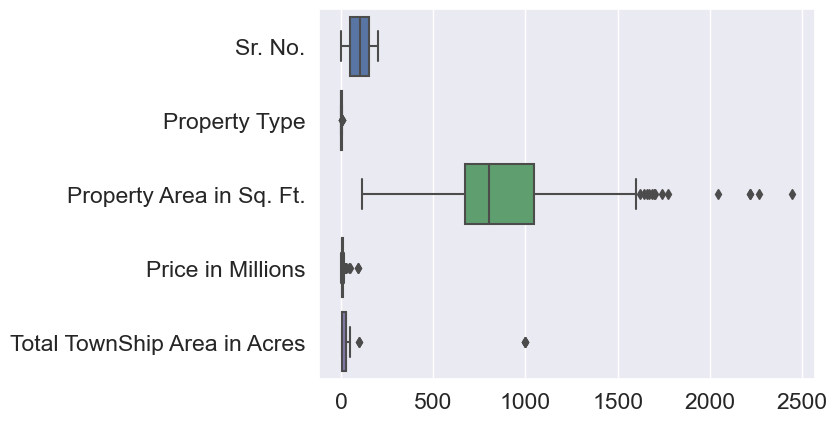

In [18]:
sns.boxplot(data=df_norm, orient="h")
plt.show()

In [19]:
def computeUpperFence(df_col, up=True):
    """
    Computes the upper/lower fence for a given column.
    Params:
        df_col: Pandas series, dataframe column
        up: boolean, True for upper fence, False for lower fence
    Return:
        upper/lower fence value : float
    """    
    iqr = df_col.quantile(.75) - df_col.quantile(.25)
    if up:
        return df_col.quantile(.75) + iqr*1.5
    return df_col.quantiles(.25) - iqr*1.5
    

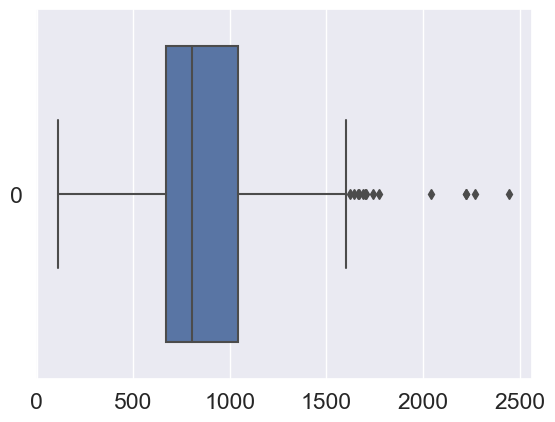

In [20]:
sns.boxplot(data=df_norm["Property Area in Sq. Ft."], orient = "h")
plt.show()

In [21]:
# Checking the outliers for Property Area in Sq. Ft.
x_pa = df_norm["Property Area in Sq. Ft."]
pa_up_lim = computeUpperFence(x_pa)
df_norm[x_pa> pa_up_lim]

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
41,42,"Pune, Maharashtra, India",Keshav Nagar,3.0,1705.0,Null,NaN,Mantra Properties,Mantra Insignia,NaN,Yes,No,No,No,Yes,Yes,Yes
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13.0,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no


They are atypical not outliers. They have many rooms. 

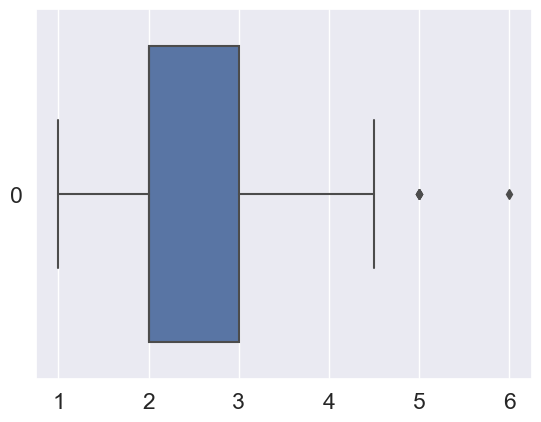

In [22]:
sns.boxplot(data = df_norm["Property Type"], orient="h")
plt.show()

In [23]:
# Checking the outliers for Property type.
x_prt = df_norm["Property Type"]
part_up_lim = computeUpperFence(x_prt)
df_norm[x_prt > part_up_lim]

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
50,51,"Pune, Maharashtra, India",Akurdi,5.0,1579.0,163,16.3,Mantra Properties,Mantra Sky Tower,3.5,Yes,No,No,No,Yes,Yes,Yes
128,129,"Pune, Maharashtra, India",Hinjewadi,5.0,1772.0,177,17.7,Shapoorji Paloonji,Sensorium,NaN,yes,no,no,no,yes,yes,yes
131,132,"Pune, Maharashtra, India",hadapsar,5.0,1662.0,130,13.0,Wellwisher Apartments,kiarah terrazo,NaN,no,no,no,no,yes,no,no


They are atypical not outliers. They have many rooms. 

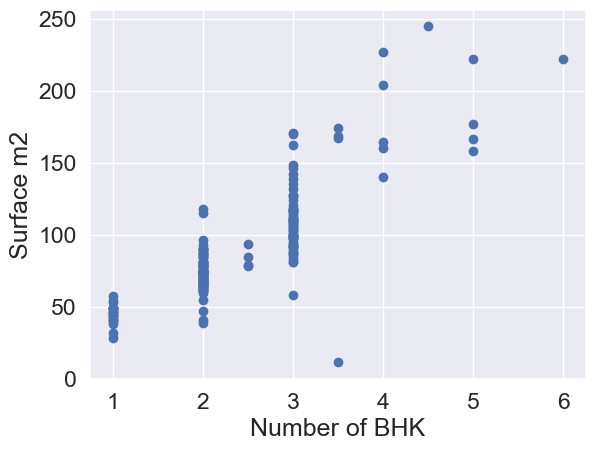

In [24]:
plt.scatter(df_norm["Property Type"],
           df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Number of BHK")
plt.ylabel("Surface m2")
plt.show()

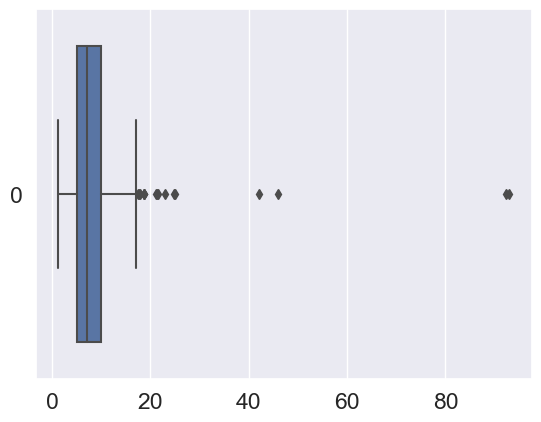

In [25]:
sns.boxplot(data=df_norm["Price in Millions"], orient="h")
plt.show()

In [26]:
x_pim = df_norm['Price in Millions']
pim_up_lim = computeUpperFence(x_pim)
df_norm[x_pim > pim_up_lim]

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
67,68,"Pune, Maharashtra, India",kayani nagar,3.0,1698.0,249,24.9,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
68,69,"Pune, Maharashtra, India",kayani nagar,4.0,2267.0,460,46.0,sagitarius ecospaces llp,bluegrass residences,NaN,yes,no,no,no,yes,yes,yes
73,74,"Pune, Maharashtra, India",pisoli,3.0,923.0,923,92.3,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes
74,75,"Pune, Maharashtra, India",pisoli,3.0,930.0,930,93.0,nirman developers,brookefield willows,NaN,yes,no,no,no,yes,yes,yes
94,95,"Pune, Maharashtra, India",NIBM,3.0,1388.0,178,17.8,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
95,96,"Pune, Maharashtra, India",NIBM,3.0,1463.0,187,18.7,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
96,97,"Pune, Maharashtra, India",NIBM,3.5,1671.0,211,21.1,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes
97,98,"Pune, Maharashtra, India",NIBM,3.5,1687.0,213,21.3,kundan Spaces,Presidia,NaN,yes,no,no,no,yes,Yes,yes


They are essentially large apartments except 2.Line 73, 74

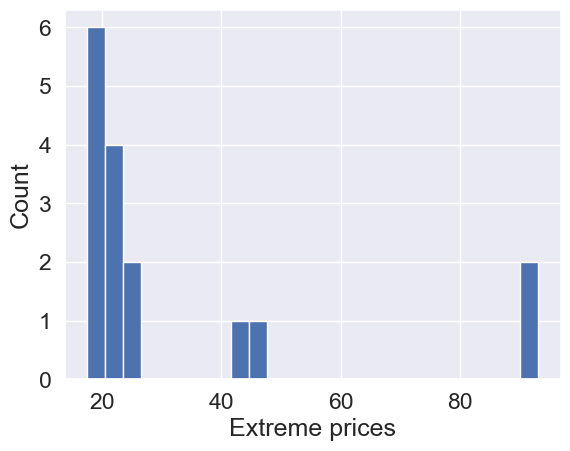

In [27]:
df_norm[ x_pim> pim_up_lim]["Price in Millions"].hist(bins=25)
plt.xlabel("Extreme prices")
plt.ylabel("Count")
plt.show()

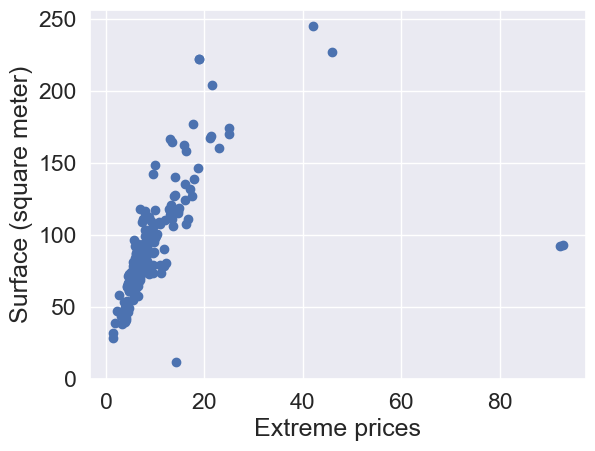

In [28]:
plt.scatter(df_norm["Price in Millions"], 
            df_norm["Property Area in Sq. Ft."]*.1)
plt.xlabel("Extreme prices")
plt.ylabel("Surface (square meter)")
plt.show()

In [29]:
df_norm = df_norm[df_norm["Price in Millions"] < 80]

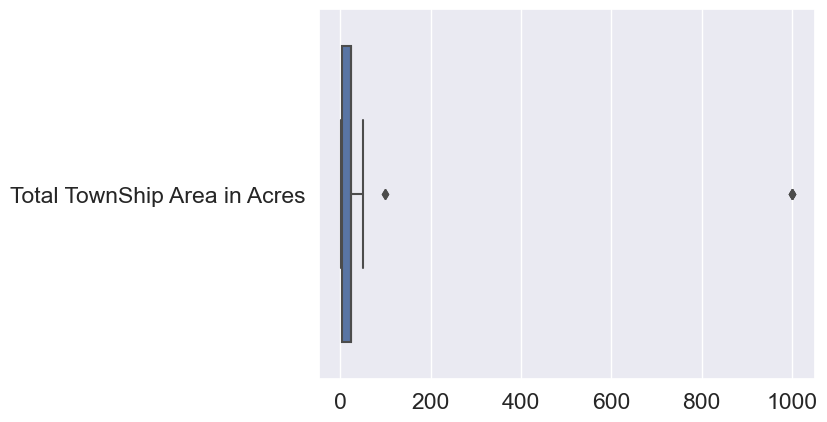

In [30]:
sns.boxplot( data=df_norm[["Total TownShip Area in Acres"]], orient="h" )
plt.show()

In [31]:
# Checking the outliers for Total TownShip Area in Acres
x_tta = df_norm['Total TownShip Area in Acres']
tta_up_lim = computeUpperFence(x_tta)
df_norm[x_tta > tta_up_lim]


,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,"Pune, Maharashtra, India",Bavdhan,1.0,492.0,39,3.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,2,"Pune, Maharashtra, India",Bavdhan,2.0,774.0,65,6.5,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,3,"Pune, Maharashtra, India",Bavdhan,3.0,889.0,74,7.4,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
3,4,"Pune, Maharashtra, India",Bavdhan,3.0,1018.0,89,8.9,Shapoorji Paloonji,Vanaha,1000.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
4,5,"Pune, Maharashtra, India",Mahalunge,2.0,743.0,74,7.4,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes
5,6,"Pune, Maharashtra, India",Mahalunge,3.0,975.0,95,9.5,Godrej Properties,Godrej Hills retreat,100.0,Yes,Yes,Yes,Yes,Yes,Yes,Yes


Large cities are not outliers.

In [32]:
tta_low_lim = computeUpperFence(x_tta)
df_norm[x_tta < tta_low_lim]

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in lakhs,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
6,7,"Pune, Maharashtra, India",Balewadi,2.0,894.5,75,7.5,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
7,8,"Pune, Maharashtra, India",Balewadi,3.0,1174.5,100,10.0,ANP CORP,ANP Universe,25.0,Yes,No,No,No,Yes,Yes,Yes
8,9,"Pune, Maharashtra, India",Ravet,2.0,905.0,65,6.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
9,10,"Pune, Maharashtra, India",Ravet,3.0,1125.0,88,8.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
10,11,"Pune, Maharashtra, India",Ravet,4.0,1644.0,135,13.5,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
11,12,"Pune, Maharashtra, India",Ravet,5.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
12,13,"Pune, Maharashtra, India",Ravet,6.0,2220.0,188,18.8,Urban Space Creator,Urban Skyline,10.0,Yes,No,No,No,Yes,Yes,Yes
13,14,"Pune, Maharashtra, India",Baner,2.0,753.5,58,5.8,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes
14,15,"Pune, Maharashtra, India",Baner,3.0,1051.0,95,9.5,VTP Reality,VTP Cierra,10.0,Yes,No,No,No,Yes,Yes,Yes
15,16,"Pune, Maharashtra, India",Mahalunge,1.0,423.0,40,4.0,VTP Reality,VTP Blue Water,50.0,Yes,No,No,No,Yes,Yes,Yes


These are small sub-areas

## Price Selection

In [33]:
# Comparing Price in Millions with Price in lakhs
df_norm["Price in lakhs"] = df_norm["Price in lakhs"].apply(lambda x: pd.to_numeric(x, errors='coerce'))

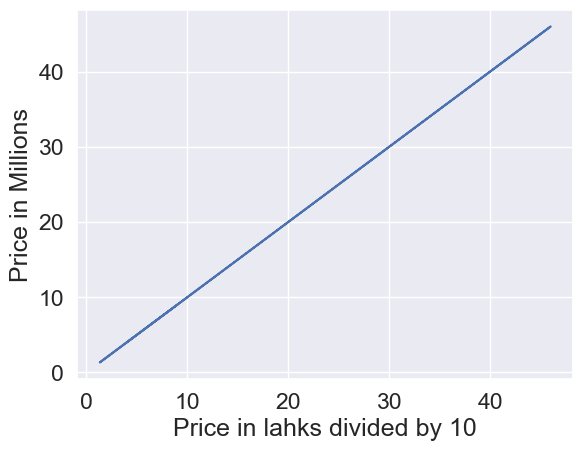

In [34]:
plt.plot(df_norm["Price in lakhs"]/10., df_norm["Price in Millions"])
plt.xlabel("Price in lahks divided by 10")
plt.ylabel("Price in Millions")
plt.show()

In [35]:
df_norm = df_norm.drop(columns=["Price in lakhs"])

### Dealing with NaN values

In [36]:
def compute_fill_rate( df ) :
    """
    Computing the rate of non-NaNs for each column
    Params :
        df : Pandas dataframe, input data
    Return :
        Pandas dataframe
    """
    fr = pd.DataFrame(1-df.isnull().sum().values.reshape(1,-1)/df.shape[0], 
                         columns=df.columns)
    return fr

###########################################
def plot_fill_rate( df ) : 
    """
    Plot the fill rate
    df : Pandas dataframe, input data
    """
    fill_rate = compute_fill_rate( df )
    fig, ax = plt.subplots( figsize=(18,18) )
    sns.barplot(data=fill_rate, orient="h")
    ax.set_title( "Fill rate for columns", fontsize=28 )
    ax.set(xlim=(0, 1.))
    
    
###########################################
def drop_empty_axis( df, minFillRate, axis=1 ) :
    """
    Drops axes that do not meet the minimum non-Nan rate
    Params :
        df : Pandas dataframe
        minFillRate : float, minimum filled fraction [0,1]
        axis : int, 1 for column, 0 for row
    Returns :
        Pandas dataframe 
    """
    i = 0 if axis==1 else 1 
    return df.dropna( axis=axis, thresh=int(df.shape[i]*minFillRate) )
      

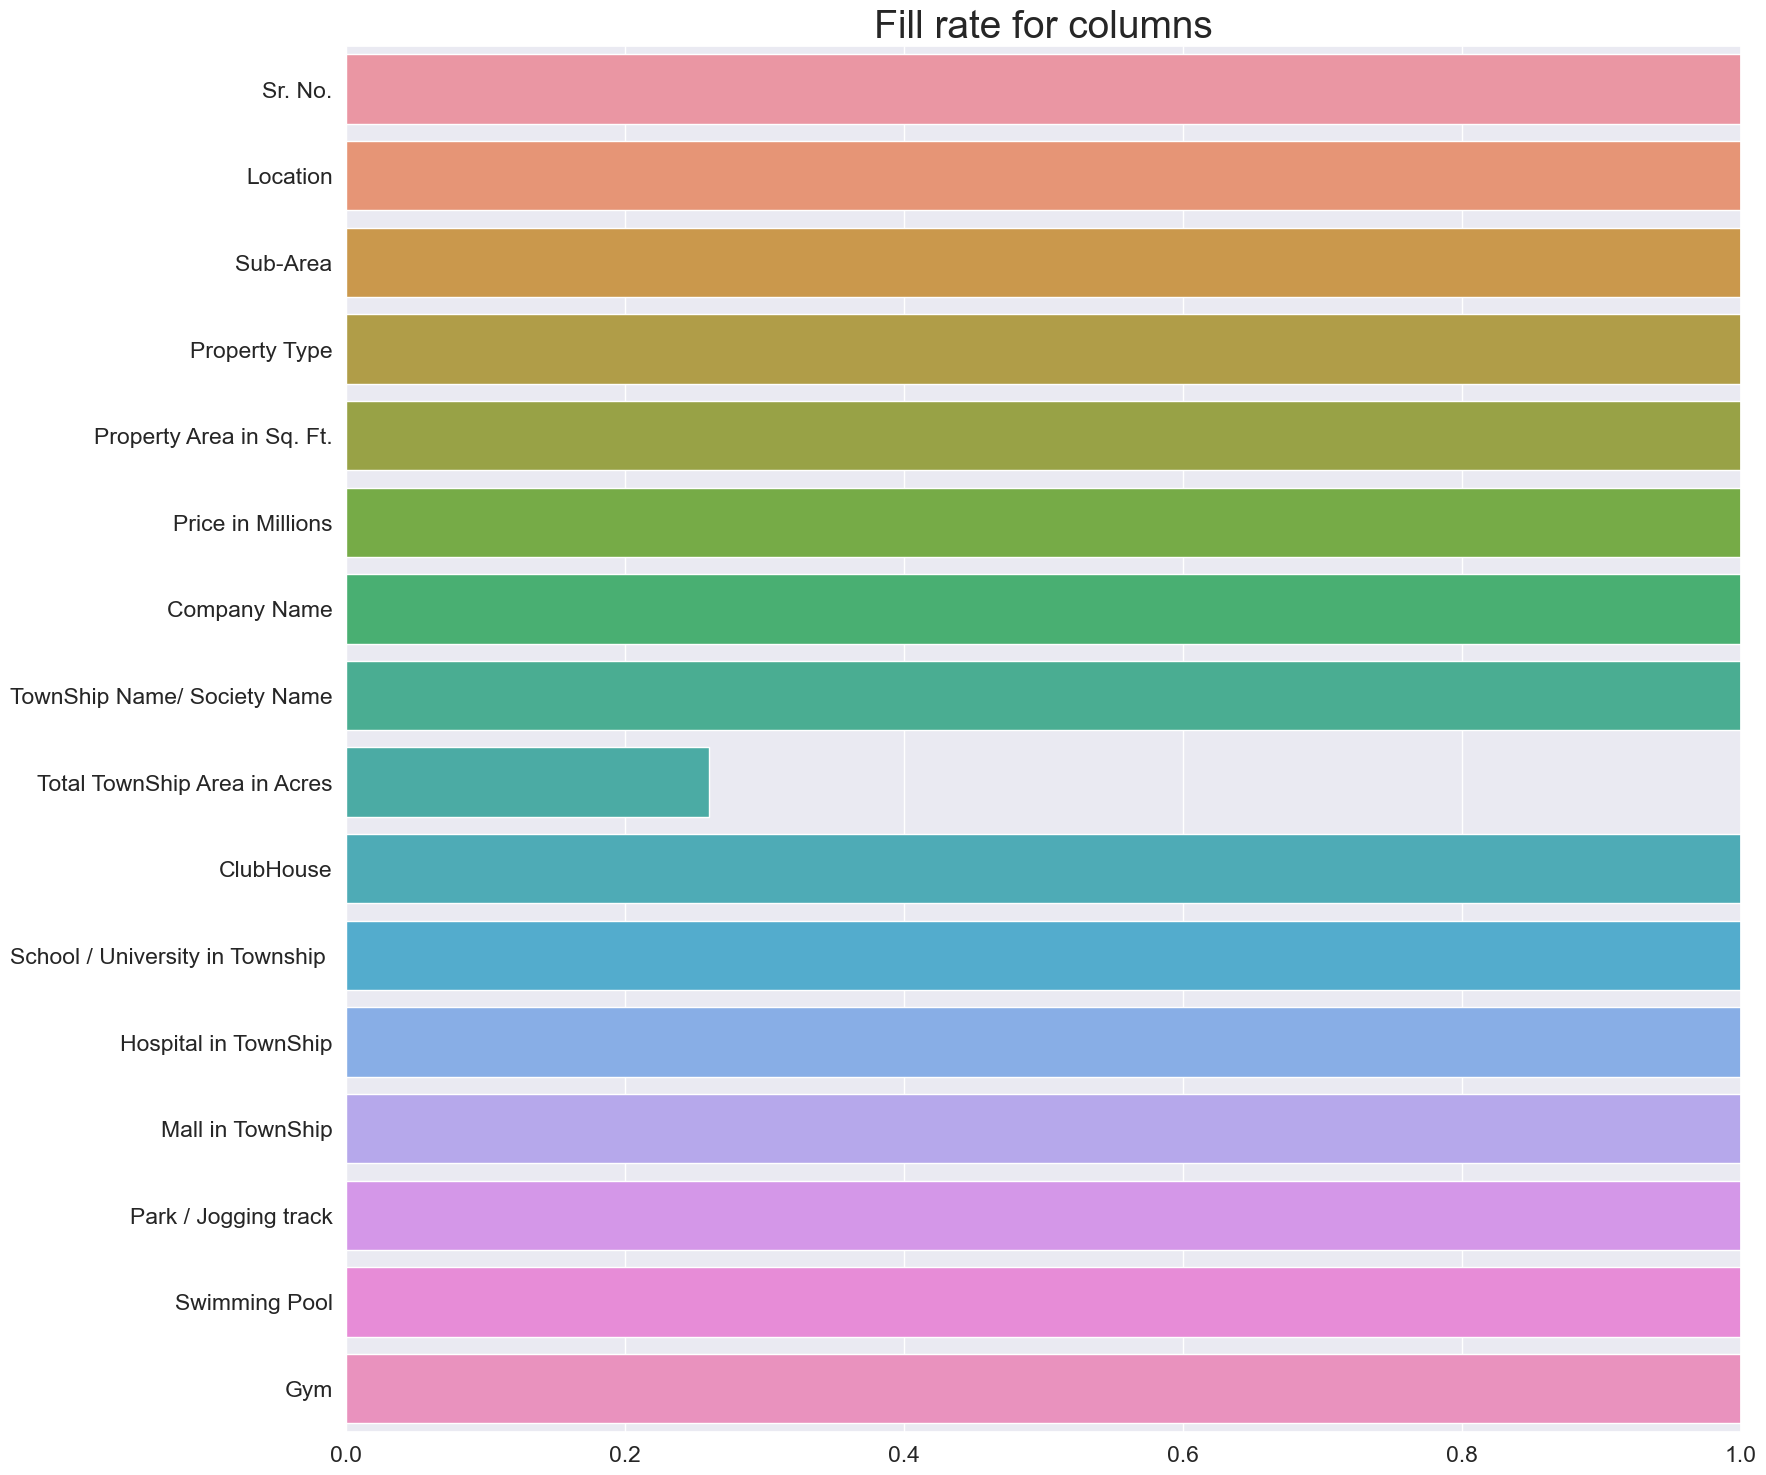

In [37]:
plot_fill_rate(df_norm)

In [38]:
compute_fill_rate( df_norm )

,Sr. No.,Location,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,Total TownShip Area in Acres,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.260204,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [39]:
df_norm[["Sub-Area", "TownShip Name/ Society Name", "Total TownShip Area in Acres"]].sort_values("Sub-Area").reset_index(drop=True)

,Sub-Area,TownShip Name/ Society Name,Total TownShip Area in Acres
0,Akurdi,Mantra Sky Tower,3.5
1,Akurdi,Mantra Sky Tower,3.5
2,Akurdi,Mantra Sky Tower,3.5
3,Akurdi,Mantra Sky Tower,3.5
4,Akurdi,Mantra Sky Tower,3.5
5,Akurdi,Mantra Sky Tower,3.5
6,BANER,TEJ ELEVIA,2.5
7,BANER,vtp solitaire,NaN
8,BANER,SUPREME ESTIA,5.0
9,BANER,SUPREME ESTIA,5.0


In [40]:
df_norm = drop_empty_axis(df_norm, minFillRate = .5)

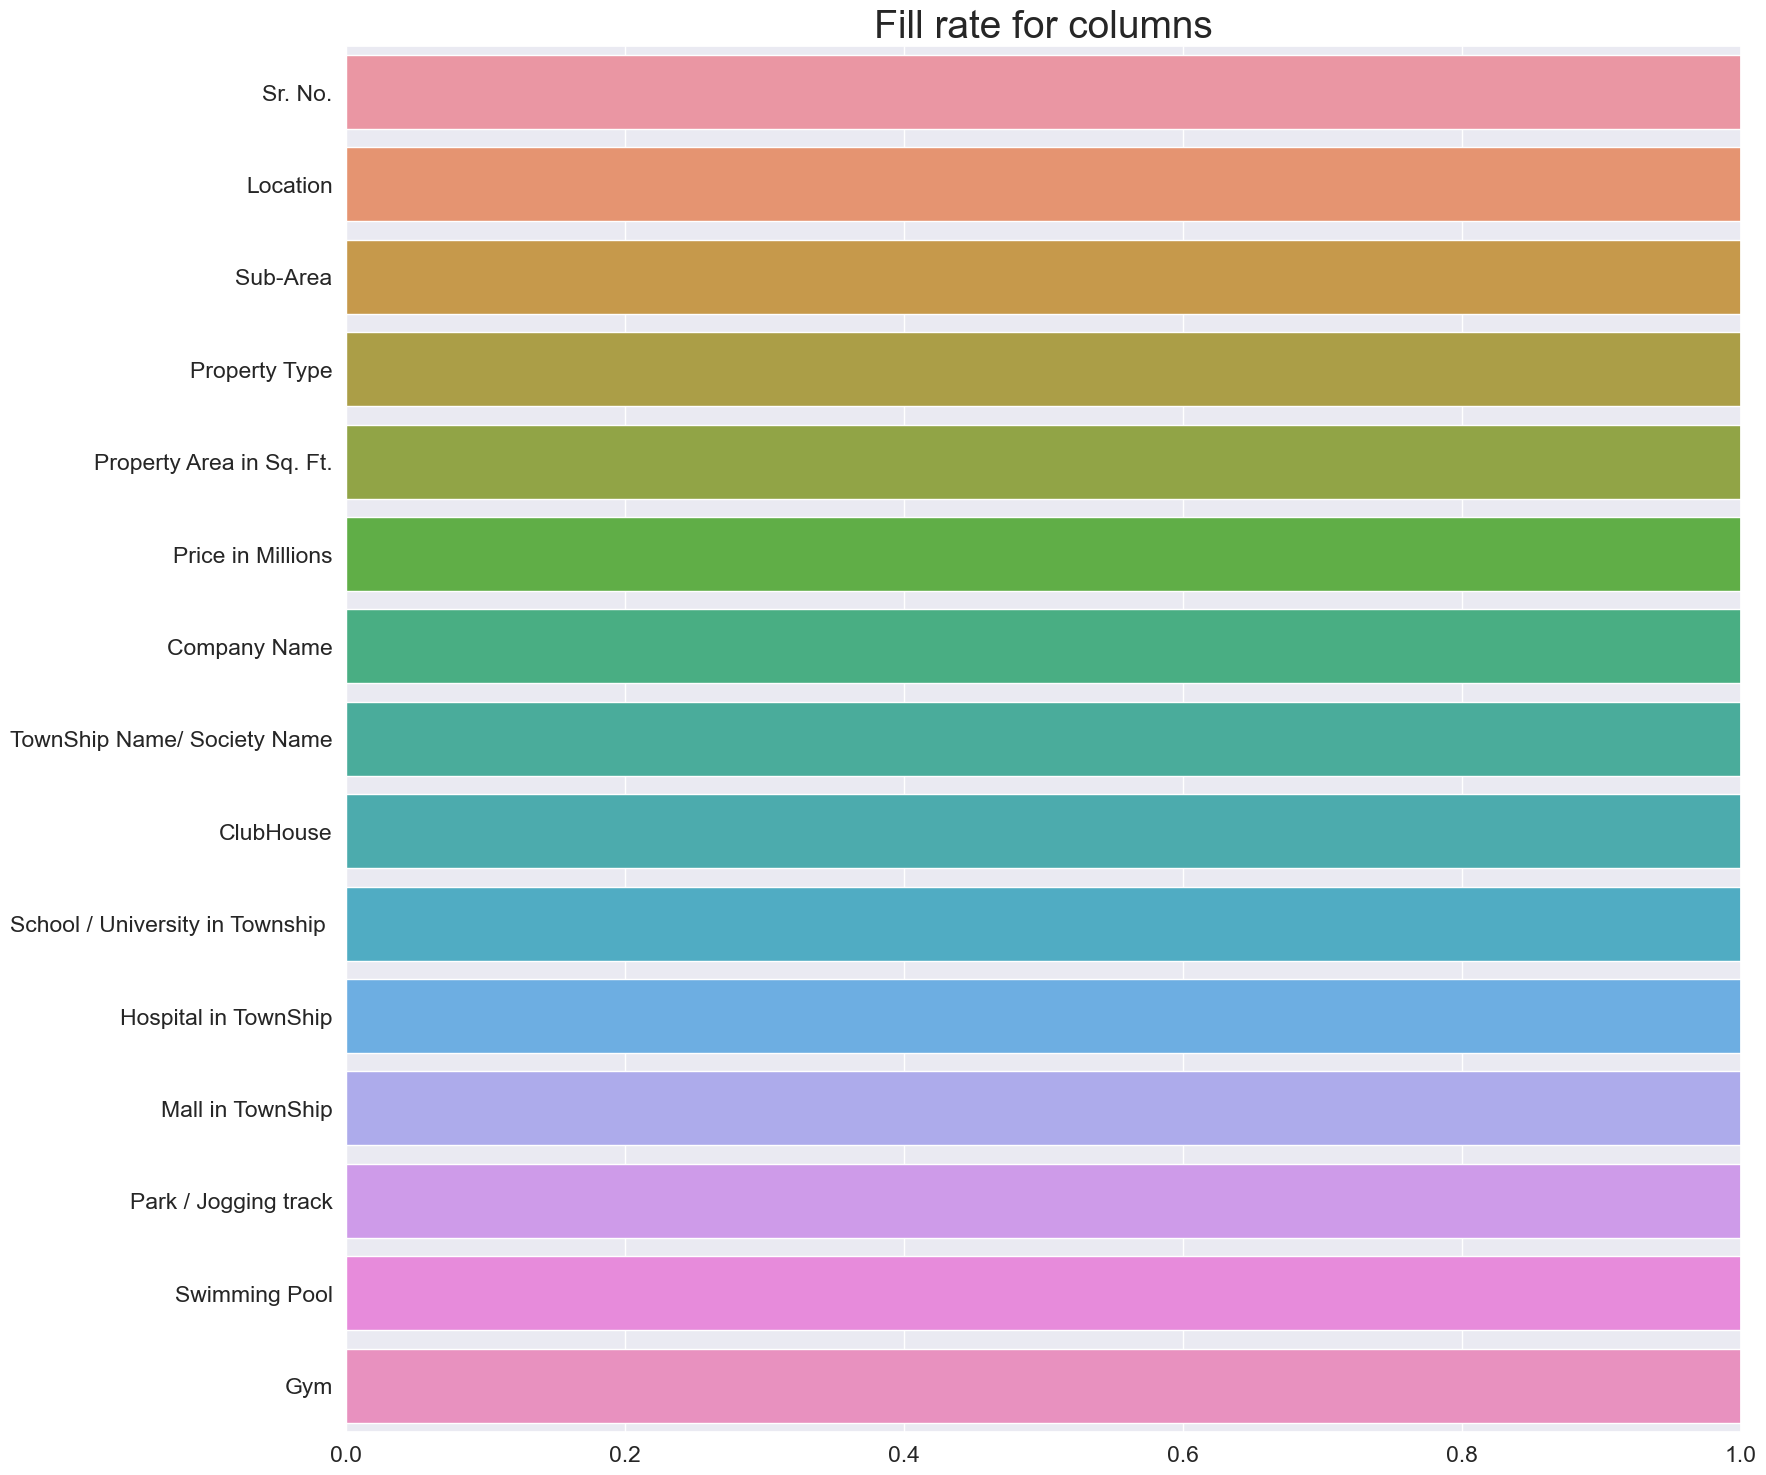

In [41]:
plot_fill_rate( df_norm )

### Regularising the categorical columns

In [42]:
df_norm.select_dtypes(include="object").head(3)

,Location,Sub-Area,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes
2,"Pune, Maharashtra, India",Bavdhan,Shapoorji Paloonji,Vanaha,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [43]:
binary_cols = df_norm.iloc[:, -7:].columns.to_list()
binary_cols

['ClubHouse',
 'School / University in Township ',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [44]:
def print_uniques(cols, df=df_norm):
    for col in cols:
        list_unique = df[col].unique()
        list_unique.sort()
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("-------------------")

In [45]:
print_uniques(binary_cols)

ClubHouse :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
-------------------
School / University in Township  :
 ['No' 'Yes' 'no']
Number of unique categories: 3
-------------------
Hospital in TownShip :
 ['No' 'Yes' 'no']
Number of unique categories: 3
-------------------
Mall in TownShip :
 ['No' 'Yes' 'no' 'no ']
Number of unique categories: 4
-------------------
Park / Jogging track :
 ['No' 'Yes' 'no' 'yes']
Number of unique categories: 4
-------------------
Swimming Pool :
 ['No' 'Yes' 'no' 'no ' 'yes']
Number of unique categories: 5
-------------------
Gym :
 ['Yes' 'no' 'no ' 'yes']
Number of unique categories: 4
-------------------


In [46]:
for col in binary_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())

In [47]:
print_uniques(binary_cols)

ClubHouse :
 ['no' 'yes']
Number of unique categories: 2
-------------------
School / University in Township  :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Hospital in TownShip :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Mall in TownShip :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Park / Jogging track :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Swimming Pool :
 ['no' 'yes']
Number of unique categories: 2
-------------------
Gym :
 ['no' 'yes']
Number of unique categories: 2
-------------------


### Multi-categorical columns

In [48]:
obj_cols = df_norm.select_dtypes(include="object").columns.to_list()
multiCat_cols = list(set(obj_cols)^set(binary_cols))
multiCat_cols

['Location', 'Company Name', 'Sub-Area', 'TownShip Name/ Society Name']

In [49]:
for col in multiCat_cols:
    df_norm[col] = df_norm[col].apply(lambda x: x.strip().lower())

In [50]:
print_uniques(multiCat_cols)

Location :
 ['pune, maharashtra, india']
Number of unique categories: 1
-------------------
Company Name :
 ['ace constructions' 'anp corp' 'bhaktamar realities' 'calyx spaces'
 'dolphin group' 'godrej properties' 'jhala group' 'kalpataru'
 'keystone landmark' 'kohinoor group' 'kundan spaces' 'lush life'
 'maha anand pinnac associates' 'majestique landmarks' 'mantra properties'
 'nirman developers' 'oxy buildcorp' 'porwal  develkoper'
 'porwal & anand develkoper' 'proviso group' 'puraniks' 'ravima ventures'
 'sagitarius ecospaces llp' 'shapoorji paloonji' 'shroff developers'
 'sukwani associates' 'supreme' 'tejraaj group' 'unique properties'
 'urban space creator' 'vasupujya corporation'
 'venkatesh bhoomi construction' 'vijaya laxmi creations'
 'vijaya laxmi infrarealtors' 'vtp reality' 'waghvani constructions'
 'wellwisher apartments']
Number of unique categories: 37
-------------------
Sub-Area :
 ['akurdi' 'balewadi' 'baner' 'bavdhan' 'bavdhan budruk' 'bt kawade rd'
 'dhanori' 'had

In [51]:
df_norm.drop(columns=["Location"], inplace=True)

In [52]:
df_norm.head()

,Sr. No.,Sub-Area,Property Type,Property Area in Sq. Ft.,Price in Millions,Company Name,TownShip Name/ Society Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym
0,1,bavdhan,1.0,492.0,3.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
1,2,bavdhan,2.0,774.0,6.5,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
2,3,bavdhan,3.0,889.0,7.4,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
3,4,bavdhan,3.0,1018.0,8.9,shapoorji paloonji,vanaha,yes,yes,yes,yes,yes,yes,yes
4,5,mahalunge,2.0,743.0,7.4,godrej properties,godrej hills retreat,yes,yes,yes,yes,yes,yes,yes


In [53]:
df_norm.shape

(196, 14)

In [54]:
df_norm.columns = ["index", "sub_area", "n_bhk", "surface", "price", 
                                     "company_name", "township",
                                     "club_house", "school", "hospital", 
                                     "mall", "park", "pool", "gym"]

# 2. Exploratory Data Analysis

In [55]:
df = df_norm

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 199
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         196 non-null    int64  
 1   sub_area      196 non-null    object 
 2   n_bhk         196 non-null    float64
 3   surface       196 non-null    float64
 4   price         196 non-null    float64
 5   company_name  196 non-null    object 
 6   township      196 non-null    object 
 7   club_house    196 non-null    object 
 8   school        196 non-null    object 
 9   hospital      196 non-null    object 
 10  mall          196 non-null    object 
 11  park          196 non-null    object 
 12  pool          196 non-null    object 
 13  gym           196 non-null    object 
dtypes: float64(3), int64(1), object(10)
memory usage: 23.0+ KB


In [57]:
df["company_name"].unique(), df["township"].unique()

(array(['shapoorji paloonji', 'godrej properties', 'anp corp',
        'urban space creator', 'vtp reality', 'waghvani constructions',
        'sukwani associates', 'mantra properties', 'ravima ventures',
        'proviso group', 'unique properties', 'sagitarius ecospaces llp',
        'nirman developers', 'jhala group', 'shroff developers',
        'kundan spaces', 'venkatesh bhoomi construction', 'lush life',
        'maha anand pinnac associates', 'vasupujya corporation',
        'ace constructions', 'wellwisher apartments', 'dolphin group',
        'oxy buildcorp', 'kohinoor group', 'bhaktamar realities',
        'porwal & anand develkoper', 'porwal  develkoper',
        'keystone landmark', 'puraniks', 'majestique landmarks',
        'kalpataru', 'vijaya laxmi creations',
        'vijaya laxmi infrarealtors', 'calyx spaces', 'supreme',
        'tejraaj group'], dtype=object),
 array(['vanaha', 'godrej hills retreat', 'anp universe', 'urban skyline',
        'vtp cierra', 'vtp blue

In [58]:
df = df.drop(columns = ["index", "company_name", "township"]).drop_duplicates()

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sub_area    196 non-null    object 
 1   n_bhk       196 non-null    float64
 2   surface     196 non-null    float64
 3   price       196 non-null    float64
 4   club_house  196 non-null    object 
 5   school      196 non-null    object 
 6   hospital    196 non-null    object 
 7   mall        196 non-null    object 
 8   park        196 non-null    object 
 9   pool        196 non-null    object 
 10  gym         196 non-null    object 
dtypes: float64(3), object(8)
memory usage: 18.4+ KB


## Converting binary columns to dummy variables

In [60]:
binary_cols = df.iloc[:, 4:].columns.to_list()
binary_cols

['club_house', 'school', 'hospital', 'mall', 'park', 'pool', 'gym']

In [61]:
# average price for apartments with and without swimming pool
df[["price","pool"]].groupby("pool")["price"].mean()

pool
no      6.456944
yes    10.000323
Name: price, dtype: float64

In [62]:
laben = LabelEncoder()
for col in binary_cols:
    df[col] = laben.fit_transform(df[col])

df.tail(10)

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym
190,bavdhan,2.0,665.0,6.499,1,0,0,0,1,0,0
191,talegoan,1.0,280.0,1.319,1,0,0,0,1,1,1
192,talegoan,2.0,385.0,1.729,1,0,0,0,1,0,1
193,baner,2.0,730.0,8.700,1,0,0,0,1,1,1
194,baner,3.0,1135.0,12.900,1,0,0,0,1,1,1
195,baner,3.0,1350.0,16.000,1,0,0,0,1,1,1
196,baner,4.0,1600.0,23.000,1,0,0,0,1,1,1
197,baner,2.0,789.0,9.500,0,0,0,0,1,1,1
198,baner,3.0,1107.0,13.500,0,0,0,0,1,1,1
199,baner,2.0,776.0,9.068,1,0,0,0,1,1,1


## Sub areas contribution

In [63]:
# Contribution of different sub-areas on the dataset 
df_sa_count = df.groupby("sub_area")["price"].count().reset_index().rename(columns={"price":"count"}).sort_values("count", ascending=False).reset_index(drop=True)
df_sa_count["sa_contribution"] = df_sa_count["count"]/ len(df)
df_sa_count

,sub_area,count,sa_contribution
0,kharadi,16,0.081633
1,baner,12,0.061224
2,ravet,12,0.061224
3,handewadi,11,0.056122
4,bavdhan,10,0.051020
5,bt kawade rd,10,0.051020
6,wadgaon sheri,9,0.045918
7,hinjewadi,9,0.045918
8,mahalunge,9,0.045918
9,hadapsar,8,0.040816


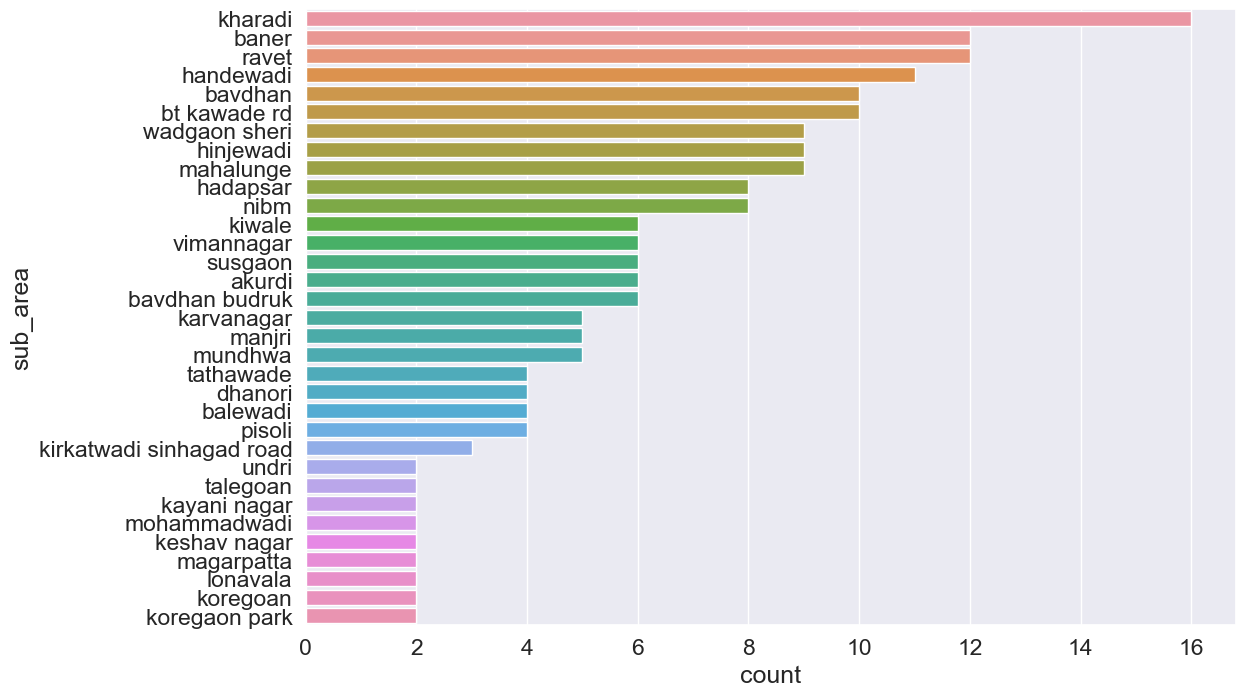

In [64]:
# Distribution of sub-areas contribution 
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=df_sa_count, x="count", y="sub_area", ax=ax)
plt.show()

In [65]:
len(df_sa_count), np.mean(df_sa_count["count"])

(33, 5.9393939393939394)

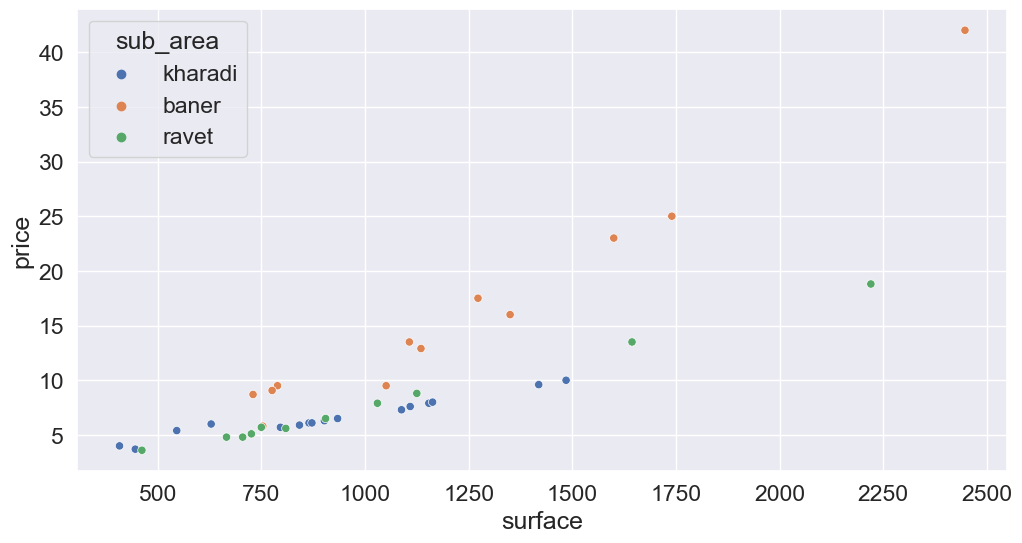

In [66]:
# Price vs surface for the first three most contribuions
fig, ax = plt.subplots(figsize=(12, 6))
df_plot = df_sa_count.merge(df[["sub_area", "surface", "price"]], on="sub_area")
df_plot = df_plot[df_plot["count"] >11]

sns.scatterplot(data=df_plot, x="surface", y="price", hue="sub_area")
plt.show()

In [67]:
# Feature engineering
sa_sel_col = df_sa_count.loc[df_sa_count["count"]>7, "sub_area"].to_list()
df["sub_area"] = df["sub_area"].where(df["sub_area"].isin(sa_sel_col), "other")

In [68]:
df["sub_area"].unique(), len(df["sub_area"].unique())

(array(['bavdhan', 'mahalunge', 'other', 'ravet', 'baner', 'kharadi',
        'hadapsar', 'handewadi', 'nibm', 'bt kawade rd', 'hinjewadi',
        'wadgaon sheri'], dtype=object),
 12)

## Converting Sub-Area to dummy variables

In [69]:
# Dummy variable conversion
hoten = OneHotEncoder(sparse=False)
X_dummy = hoten.fit_transform(df[["sub_area"]])
X_dummy.shape, X_dummy, X_dummy.dtype

((196, 12),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]),
 dtype('float64'))

In [70]:
# Type conversion
X_dummy = X_dummy.astype("int64")

In [71]:
# Adding the dummy columns to the dataset
sa_cols_name = ["sa"+str(i+1) for i in range(X_dummy.shape[1])]
df.loc[:,sa_cols_name] = X_dummy
df.head()

,sub_area,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,bavdhan,1.0,492.0,3.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,bavdhan,2.0,774.0,6.5,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,bavdhan,3.0,889.0,7.4,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,bavdhan,3.0,1018.0,8.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,mahalunge,2.0,743.0,7.4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [72]:
df[["sub_area"]+sa_cols_name].drop_duplicates().sort_values("sub_area").reset_index(drop=True)

,sub_area,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,baner,1,0,0,0,0,0,0,0,0,0,0,0
1,bavdhan,0,1,0,0,0,0,0,0,0,0,0,0
2,bt kawade rd,0,0,1,0,0,0,0,0,0,0,0,0
3,hadapsar,0,0,0,1,0,0,0,0,0,0,0,0
4,handewadi,0,0,0,0,1,0,0,0,0,0,0,0
5,hinjewadi,0,0,0,0,0,1,0,0,0,0,0,0
6,kharadi,0,0,0,0,0,0,1,0,0,0,0,0
7,mahalunge,0,0,0,0,0,0,0,1,0,0,0,0
8,nibm,0,0,0,0,0,0,0,0,1,0,0,0
9,other,0,0,0,0,0,0,0,0,0,1,0,0


## Univerate and bivariate analyses

In [73]:
# check only object datatype columns
data = df.select_dtypes(exclude="object")
data.head()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
0,1.0,492.0,3.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1,2.0,774.0,6.5,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
2,3.0,889.0,7.4,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
3,3.0,1018.0,8.9,1,1,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0
4,2.0,743.0,7.4,1,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [74]:
data.describe()

,n_bhk,surface,price,club_house,school,hospital,mall,park,pool,gym,sa1,sa2,sa3,sa4,sa5,sa6,sa7,sa8,sa9,sa10,sa11,sa12
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.385204,893.321429,8.698673,0.739796,0.030612,0.030612,0.030612,0.979592,0.632653,0.806122,0.061224,0.051020,0.051020,0.040816,0.056122,0.045918,0.081633,0.045918,0.040816,0.418367,0.061224,0.045918
std,0.847824,376.080650,5.807492,0.439869,0.172706,0.172706,0.172706,0.141754,0.483317,0.396346,0.240356,0.220603,0.220603,0.198371,0.230747,0.209844,0.274505,0.209844,0.198371,0.494554,0.240356,0.209844
min,1.000000,113.000000,1.319000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,670.000000,5.100000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,794.500000,7.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1041.250000,9.746750,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,6.000000,2447.000000,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


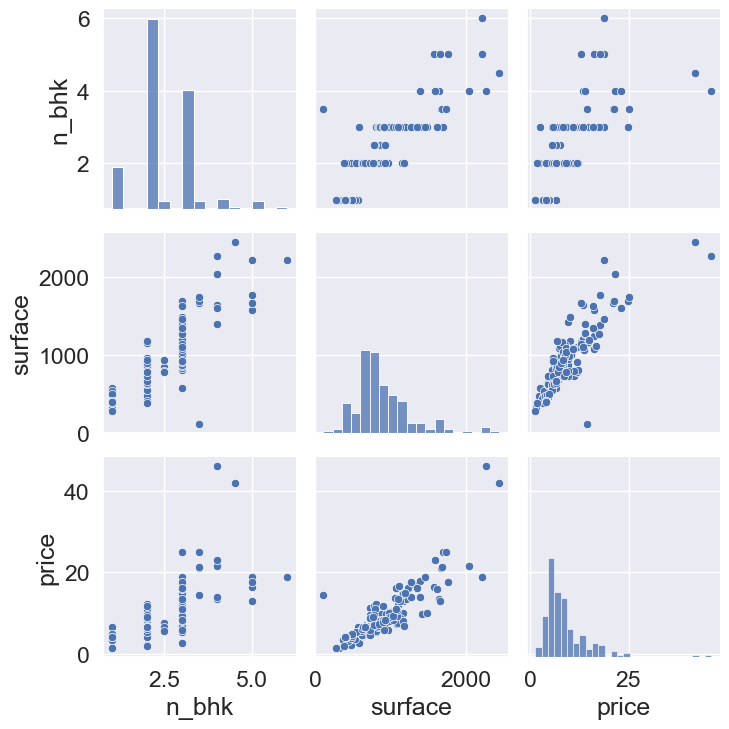

In [75]:
# Continous variables
float_cols = data.select_dtypes(include="float").columns.to_list()
sns.pairplot(data[float_cols])
plt.show()

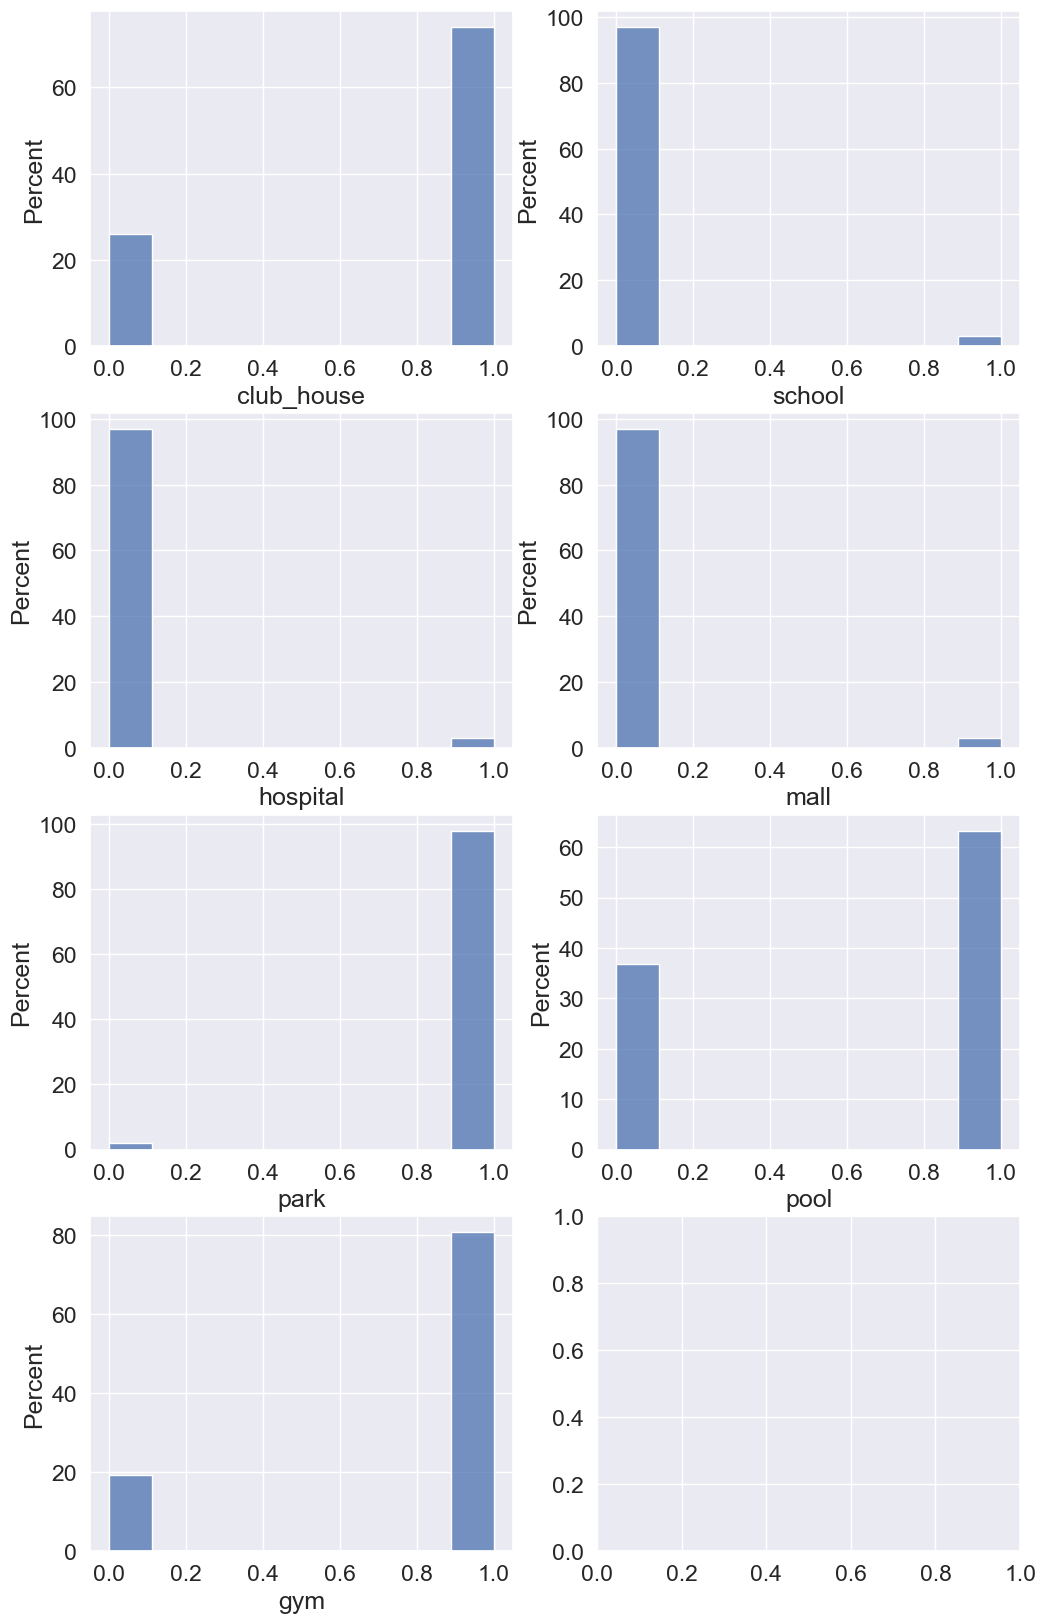

In [76]:
#Binary variables
fig, ax = plt.subplots(4,2, figsize=(12,20))
for i, col in enumerate(binary_cols):
    sns.histplot(data, x=col, ax=ax[int(i/2), i%2], stat="percent")

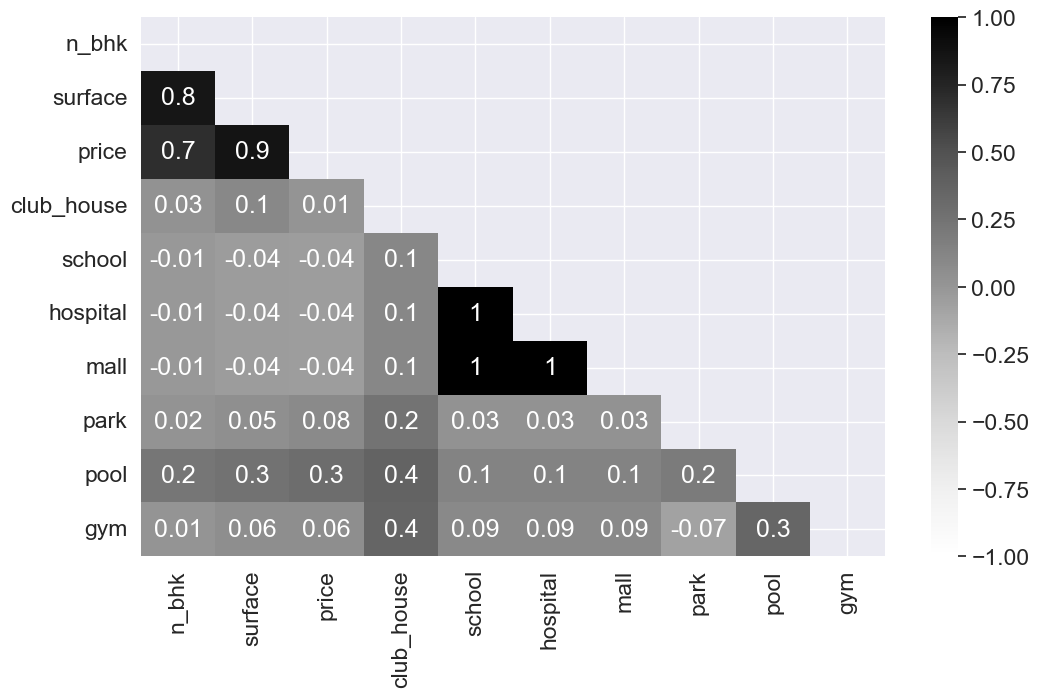

In [77]:
#Correlation map
corr_cols_list = float_cols+binary_cols
correl = data[corr_cols_list].corr()
mask = np.zeros_like(correl)

mask[np.triu_indices_from(mask)]=True

fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(correl, mask=mask, vmin=-1, cmap='Greys', annot=True, fmt='.1g')
plt.show()

## Feature Selection

In [78]:
corr_cols_list.remove("price")
corr_cols_list.extend(sa_cols_name)
corr_list = []
for col in corr_cols_list:
    corr_list.append(round(data["price"].corr(data[col]), 2))
    
corr_list

[0.7,
 0.86,
 0.01,
 -0.04,
 -0.04,
 -0.04,
 0.08,
 0.29,
 0.06,
 0.32,
 -0.12,
 0.08,
 -0.04,
 -0.17,
 0.0,
 -0.11,
 -0.05,
 0.23,
 -0.02,
 -0.0,
 -0.07]

In [79]:
#Sorted correlatios
df_corr = pd.DataFrame(data=zip(corr_cols_list, corr_list),
                      columns=["col_name", "corr"]).sort_values("corr", ascending=False).reset_index(drop=True)

In [80]:
df_corr

,col_name,corr
0,surface,0.86
1,n_bhk,0.70
2,sa1,0.32
3,pool,0.29
4,sa9,0.23
5,sa3,0.08
6,park,0.08
7,gym,0.06
8,club_house,0.01
9,sa11,-0.00


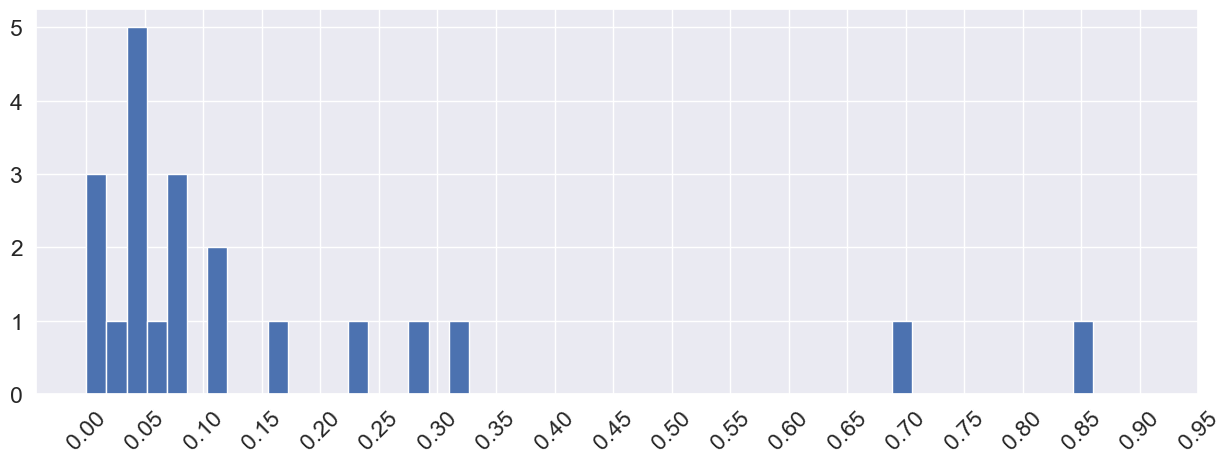

In [81]:
# Distribution of correlations with price 
fig, ax = plt.subplots(figsize=(15, 5))
abs(df_corr["corr"]).hist(bins=50)
ax.set_xticks(np.arange(0, 1, 0.05))
plt.xticks(rotation=45)
plt.show()

In [82]:
features = df_corr.loc[abs(df_corr["corr"])>.1, "col_name"].to_list()
features, len(features)

(['surface', 'n_bhk', 'sa1', 'pool', 'sa9', 'sa7', 'sa2', 'sa5'], 8)

In [83]:
# Keeping the sub areas' name, their mean price and frequency (count)
sa_feature_list = [sa for sa in features if "sa" in sa]
lst = []
for col in sa_feature_list:
    sa_triger = df[col] ==1
    sa = df.loc[sa_triger, "sub_area"].to_list()[0]
    x=df.loc[sa_triger, "price"]
    lst.append((sa, np.mean(x), df[col].sum()))
    
lst

[('baner', 16.038999999999998, 12),
 ('nibm', 15.1, 8),
 ('kharadi', 6.6310625000000005, 16),
 ('bavdhan', 5.804400000000001, 10),
 ('handewadi', 4.568818181818182, 11)]

In [84]:
# sub area mean price comparision 
sa_f = pd.DataFrame(lst, columns=["sub_area", "mean_price", "count"])
sa_f["total_mean_price"] = np.mean(df["price"])
sa_f

,sub_area,mean_price,count,total_mean_price
0,baner,16.039000,12,8.698673
1,nibm,15.100000,8,8.698673
2,kharadi,6.631063,16,8.698673
3,bavdhan,5.804400,10,8.698673
4,handewadi,4.568818,11,8.698673


## Data Scaling

In [85]:
#Selection the final dataset
sel_data = data[features+["price"]].copy()
sel_data.head()


,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,492.0,1.0,0,1,0,0,1,0,3.9
1,774.0,2.0,0,1,0,0,1,0,6.5
2,889.0,3.0,0,1,0,0,1,0,7.4
3,1018.0,3.0,0,1,0,0,1,0,8.9
4,743.0,2.0,0,1,0,0,0,0,7.4


In [86]:
# Standard scaling for surface
sc = StandardScaler(with_std=True, with_mean=True)
sel_data["surface"] = sc.fit_transform(sel_data[["surface"]])
sel_data

,surface,n_bhk,sa1,pool,sa9,sa7,sa2,sa5,price
0,-1.069848,1.0,0,1,0,0,1,0,3.900
1,-0.318089,2.0,0,1,0,0,1,0,6.500
2,-0.011520,3.0,0,1,0,0,1,0,7.400
3,0.332370,3.0,0,1,0,0,1,0,8.900
4,-0.400729,2.0,0,1,0,0,0,0,7.400
5,0.217740,3.0,0,1,0,0,0,0,9.500
6,0.003142,2.0,0,1,0,0,0,0,7.500
7,0.749570,3.0,0,1,0,0,0,0,10.000
8,0.031133,2.0,0,1,0,0,0,0,6.500
9,0.617612,3.0,0,1,0,0,0,0,8.800


## Model building

In [87]:
from time import time
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor


### Data Preparation

In [88]:
data = sel_data

In [89]:
# Features target separation
X = data.iloc[:,:-1]
y = data["price"]

In [90]:
# Random sate for data splitting
rs = 118
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.3, random_state=rs) 

In [91]:
def gridSearchReport( estimator, X, y, pg, cv=LeaveOneOut(), rs=118 ):
    """
    Performs the grid search and cross validation for the given regressor.
    Params:
        estimator:  the regressor
        X: Pandas dataframe, feature data
        y: Pandas series, target
        pg: dict, parameters' grid
        cv: int, cross-validation generator or an iterable, cross validation folds
        rs: int, training-test split random state
    """    

    t0 = time()
    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=rs) # train tets split
    
    est_cv = GridSearchCV(
        estimator, 
        param_grid=pg, 
        scoring="neg_mean_squared_error", 
        n_jobs=-1, 
        cv=cv
       )
    
    est_cv.fit(X_train, y_train)
    
    print("Best parameters:", est_cv.best_params_) # best parameters
    print("Best CV score:", abs(est_cv.best_score_)) # cross validation score
    y_train_pred, y_test_pred = est_cv.predict(X_train), est_cv.predict(X_test) # predictions on train and test data
    print("MSE, R2 train:", mean_squared_error(y_train, y_train_pred),  # evaluation metrics
          ", ", r2_score(y_train, y_train_pred) )
    print("MSE, R2 test:", mean_squared_error(y_test, y_test_pred),
          ", ", r2_score(y_test, y_test_pred) )
    
    t = round(time()-t0, 2)
    print("Elapsed time:", t, "s ,", round(t/60, 2), "min")
    
    return est_cv

In [92]:
# function to plot the residuals
def plotResidue(estimator, X, y, rs=118):
    """
    Plots the fit residuals (price - predicted_price) vs. "surface" variable.
    Params:
        estimator: GridSearchCV, the regressor
        X: Pandas dataframe, feature data
        y: Pandas series, target
        rs: int, random state
    """    
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.3, random_state=rs) # train tets split

    residue_train = y_train-estimator.predict(X_train) # make predictions
    residue_test = y_test-estimator.predict(X_test)                                                     
                                                          
    fig, axe = plt.subplots(1, 2, figsize=(18,10)) 
    axe[0].scatter( X_train["surface"], residue_train, label="train" )
    axe[0].scatter( X_test["surface"], residue_test, label="test" )
    axe[0].plot( [-2.3, 4.5], [0,0], "black" )
    axe[0].set_xlabel("Scaled surface")
    axe[0].set_ylabel("Fit residulas")
    axe[0].legend()
    
    axe[1].hist(residue_test, bins=25)
    axe[1].set_xlabel("Fit residual for test set")
    axe[1].set_ylabel("Count")


    plt.show()

    print("mean residuals:", round(np.mean(residue_test), 2),
          "\nstd:", round(np.std(residue_test), 2))

### Linear Regression

In [93]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [94]:
# check for the r2 score on train and tets data
r2_score(y_train, lr.predict(X_train)), r2_score(y_test, lr.predict(X_test))

(0.7724673402218032, 0.7831828480661263)

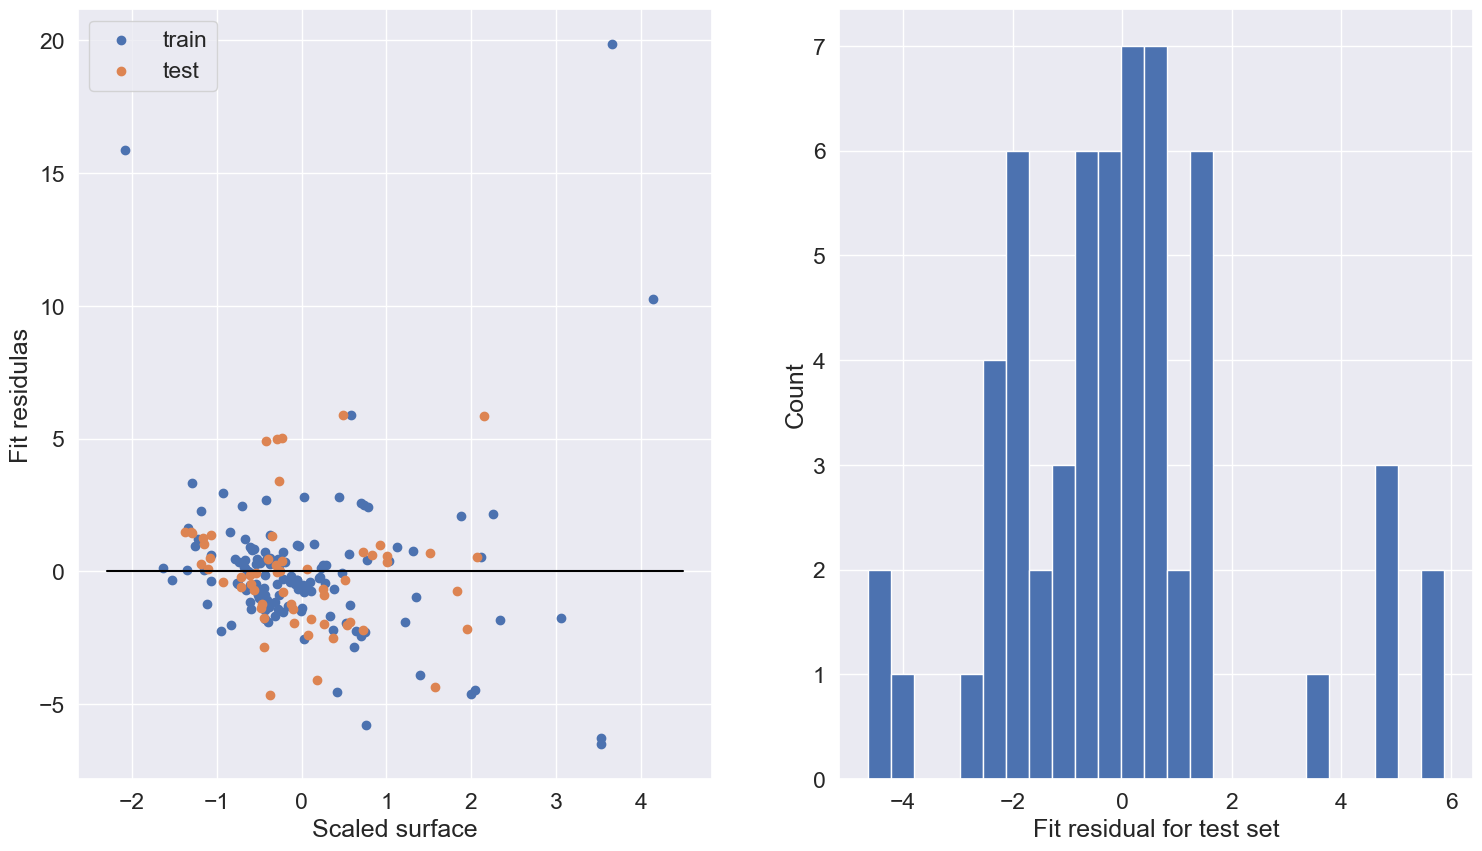

mean residuals: -0.03 
std: 2.22


In [95]:
plotResidue(lr, X, y, rs=rs)

## Ridge Regression

In [96]:
alphas = np.logspace(-3, 3, 100)
pg={"alpha":alphas}
ridge = Ridge()
ridg_cv = gridSearchReport(ridge, X, y, pg, rs=rs)

Best parameters: {'alpha': 11.497569953977356}
Best CV score: 11.563148991712927
MSE, R2 train: 9.24663765198038 ,  0.7579516034790665
MSE, R2 test: 5.687746231882704 ,  0.7499467028975038
Elapsed time: 22.33 s , 0.37 min


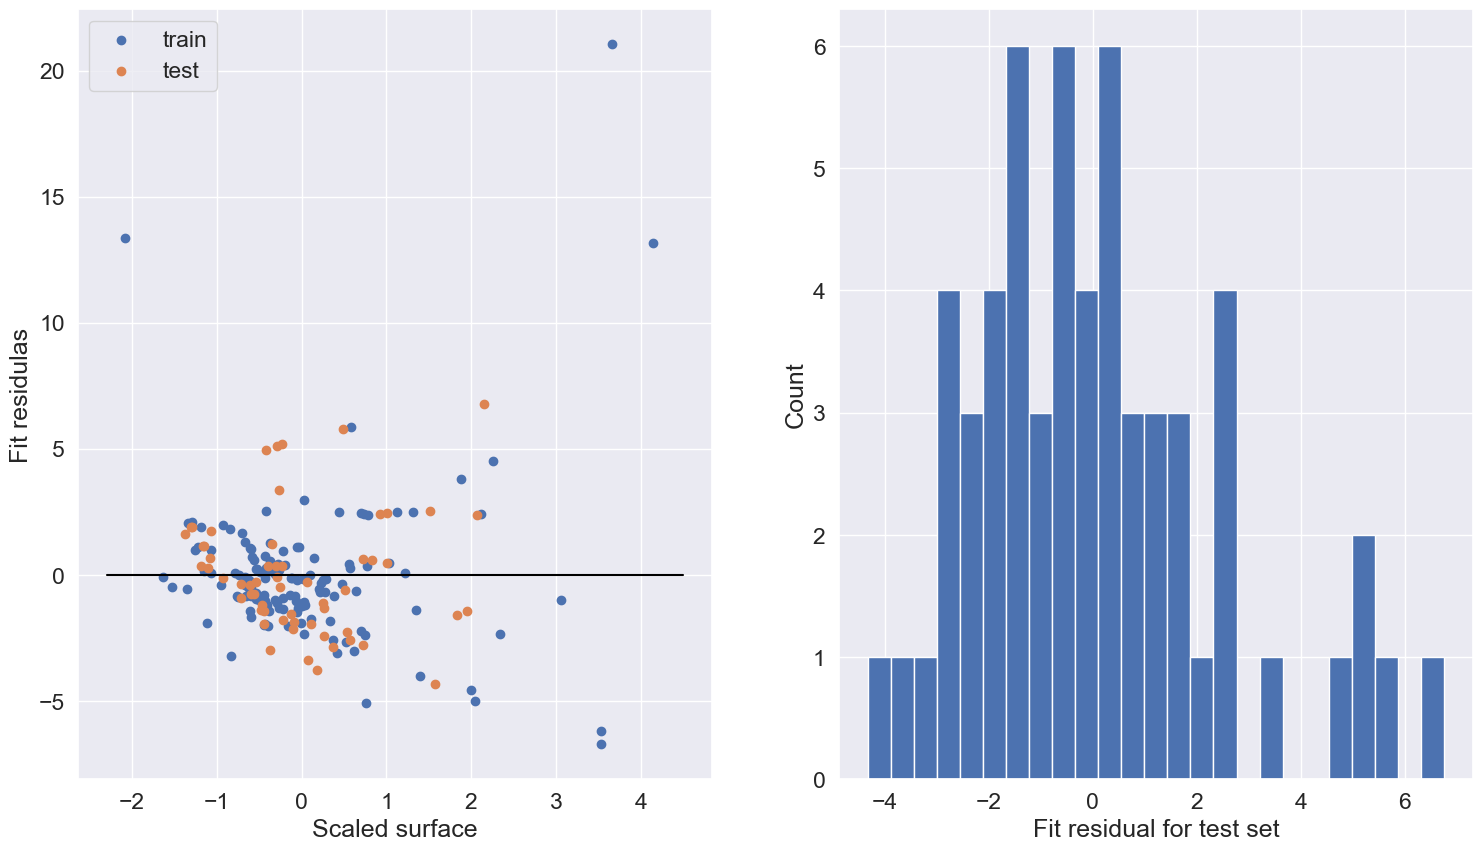

mean residuals: 0.04 
std: 2.38


In [97]:
plotResidue(ridg_cv, X, y, rs)

## Lasso Regression

In [98]:
# define the parameters and plot the lasso regression model
lasso = Lasso()
pg = {"alpha": alphas}
lasso_cv = gridSearchReport(lasso, X, y, pg, rs=rs)


Best parameters: {'alpha': 0.23101297000831605}
Best CV score: 11.48271359103876
MSE, R2 train: 9.84163374801009 ,  0.7423764445509603
MSE, R2 test: 5.755188505318877 ,  0.7469817037310024
Elapsed time: 15.46 s , 0.26 min


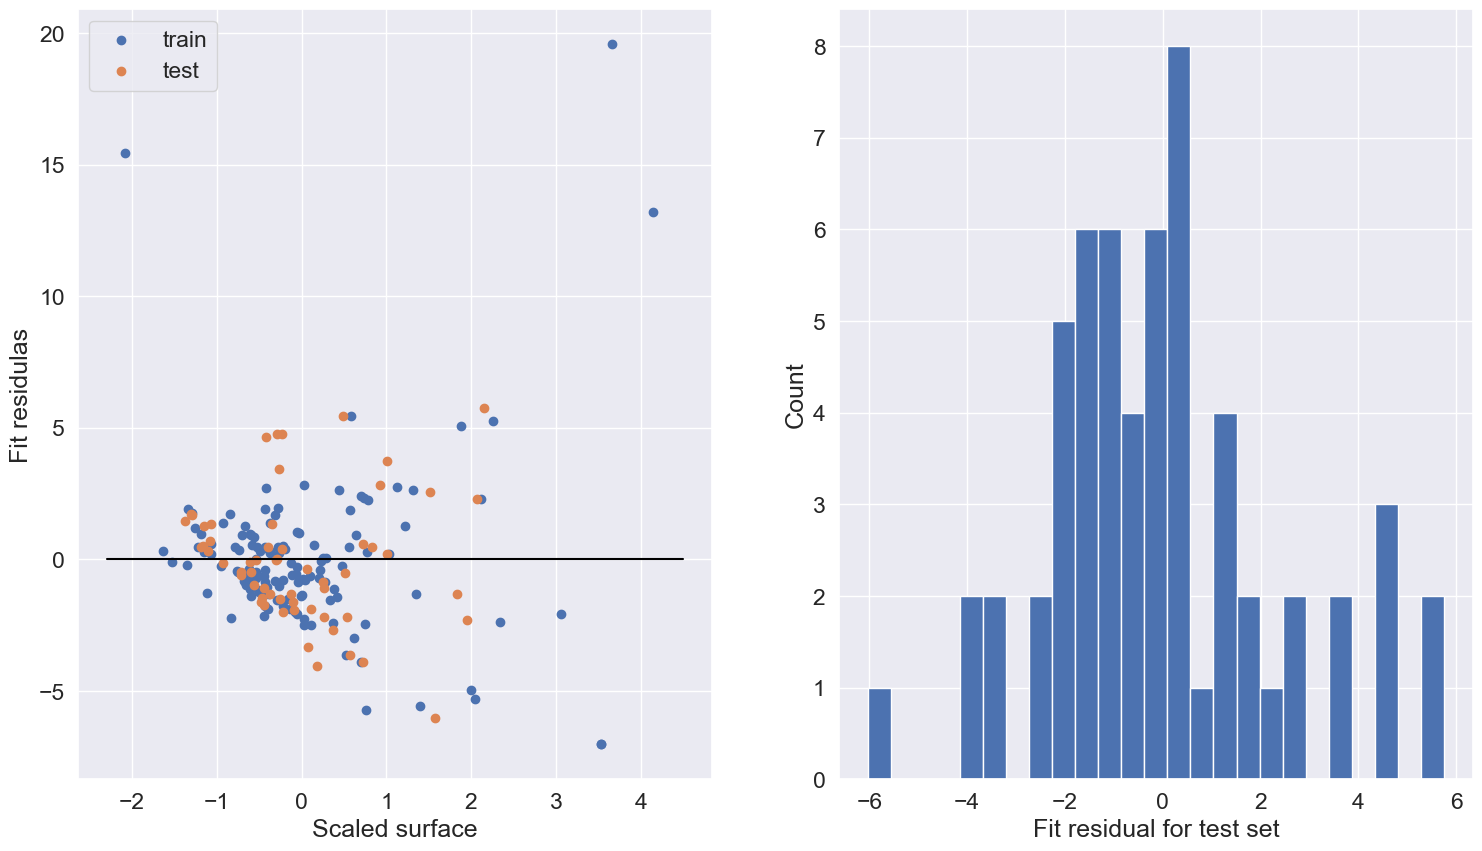

mean residuals: -0.03 
std: 2.4


In [99]:
# plot the residuals 
plotResidue(lasso_cv, X, y, rs=rs)

## Lasso and Ridge combination

In [100]:
# define an elasticnet model 
l1_ratio = np.random.rand(20)
elastic = ElasticNet()
pg = {"alpha": np.linspace(0.1,1,5), "l1_ratio":l1_ratio}
elastic_cv =gridSearchReport(elastic, X, y, pg, rs=rs)

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.30568887745545714}
Best CV score: 11.555381917708592
MSE, R2 train: 9.250074256187512 ,  0.7578616438019254
MSE, R2 test: 5.718623531247293 ,  0.7485892283905616
Elapsed time: 14.22 s , 0.24 min


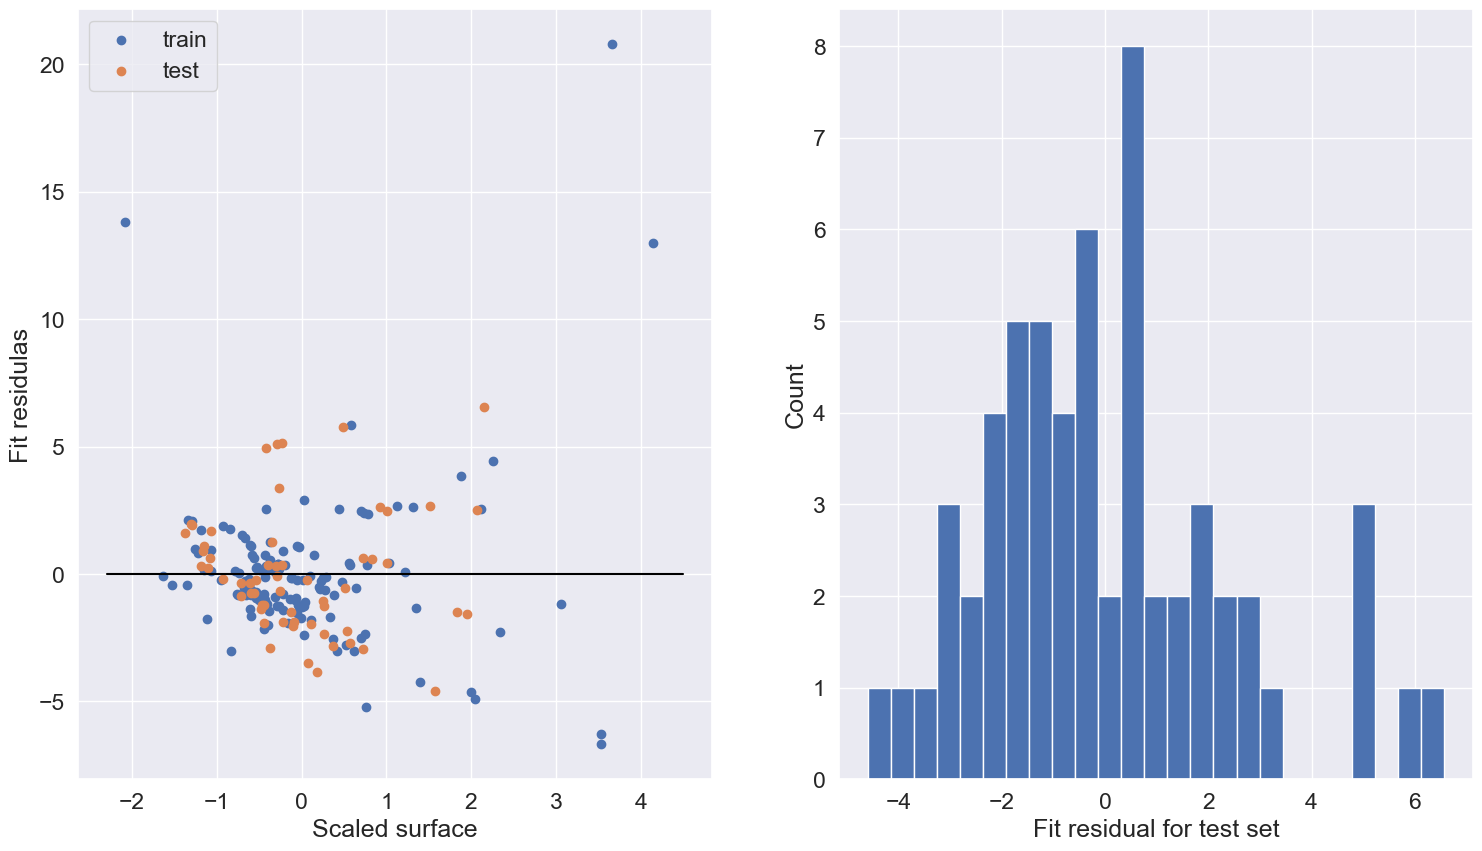

mean residuals: 0.03 
std: 2.39


In [101]:
# plot the residuals
plotResidue(elastic_cv, X, y, rs=rs)

## Random forest Regressor

In [102]:
# define a random forest regression model 
rfr = RandomForestRegressor(random_state=10)
pg = {"n_estimators":[10,20,30,50], 
     "criterion": ["squared_error", "absolute_error", "poisson"],
     "max_depth": [2,3,4], 
     "min_samples_split":range(2,10),
     "min_samples_leaf": [2,3],
     "max_features": range(4, X_train.shape[1]+1)}

rfr_cv = gridSearchReport( rfr, X, y, pg, cv=5, rs=rs)

Best parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 9, 'n_estimators': 10}
Best CV score: 14.552816154117064
MSE, R2 train: 10.12299936770073 ,  0.7350111622023379
MSE, R2 test: 5.0987184975847475 ,  0.7758424304917468
Elapsed time: 135.52 s , 2.26 min


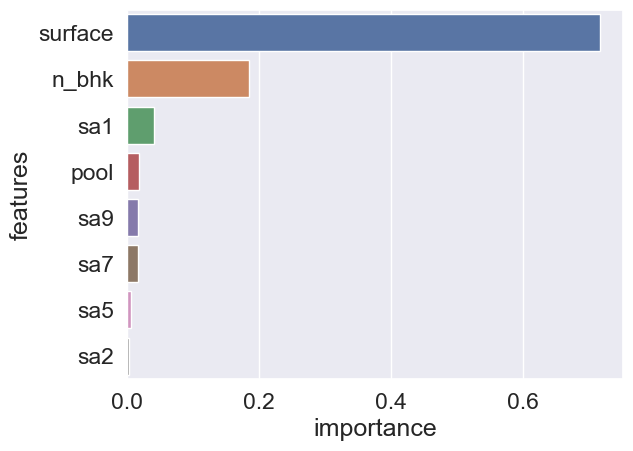

In [103]:
rfr = rfr_cv.best_estimator_
df_imp = pd.DataFrame(zip(rfr.feature_names_in_, rfr.feature_importances_))
df_imp.columns = ["features", "importance"]
df_imp = df_imp.sort_values("importance", ascending=False).reset_index(drop=True)

sns.barplot(data=df_imp, x="importance", y="features")
plt.show()

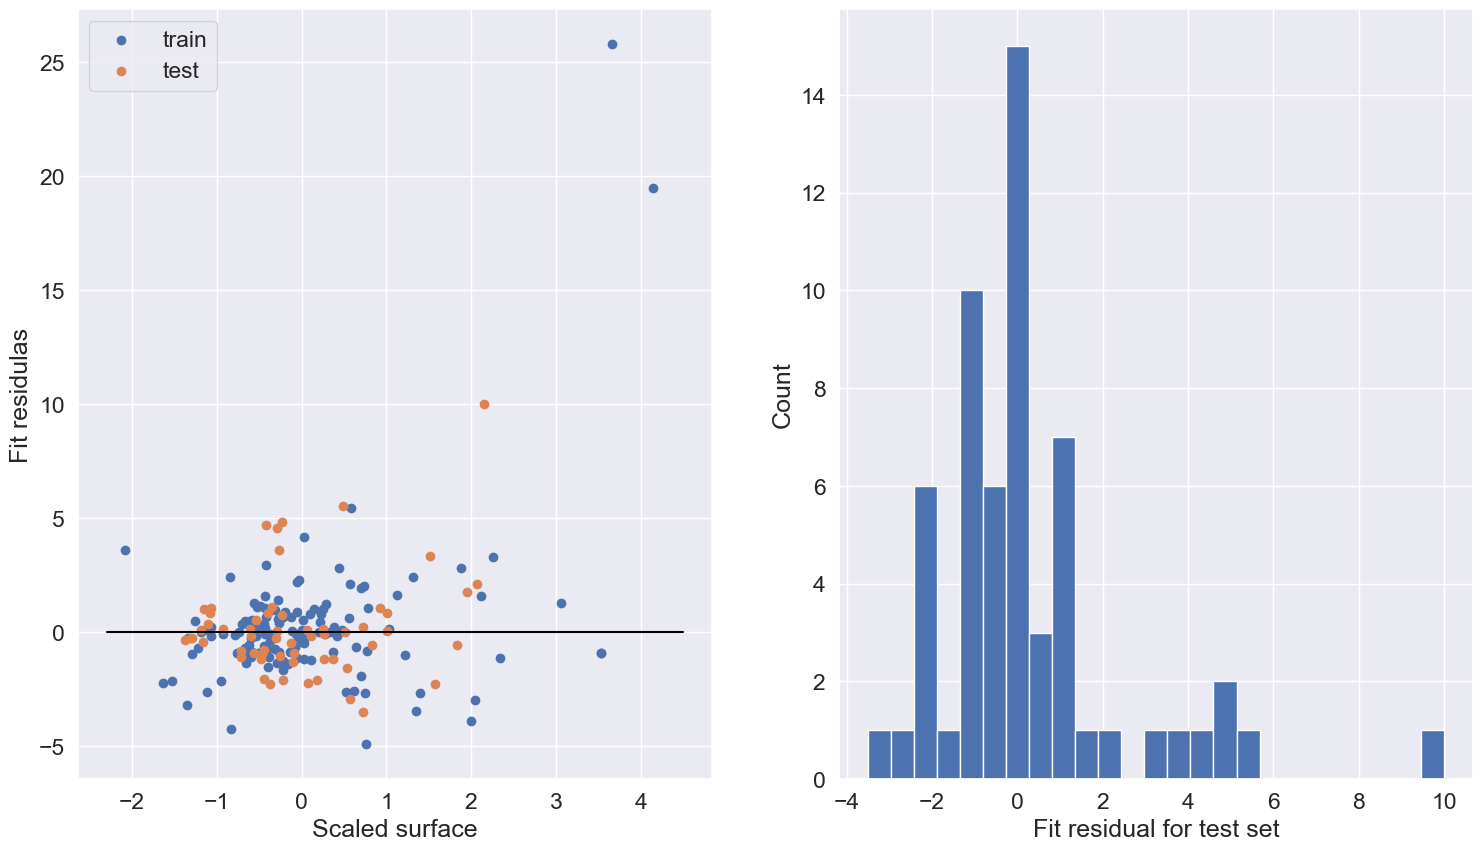

mean residuals: 0.24 
std: 2.25


In [104]:
# plot the residuals
plotResidue(rfr_cv, X, y, rs=rs)

## XGboost (extreme gradient boosting)

In [105]:
# define the parameters for XGBoost model
from scipy.stats import uniform
param_grid = {
    'gamma': uniform(loc=0.0, scale=3),
    'min_child_weight':range(3,6),
    'colsample_bytree':uniform(loc=0.1, scale=0.9),
    'subsample':uniform(loc=0.5, scale=0.5),
    'learning_rate':uniform(loc=0.01, scale=0.99)
}

In [106]:
from sklearn.model_selection import ParameterSampler
rng=np.random.RandomState(20)
n_iter = 500
param_list=list(ParameterSampler(param_grid, n_iter=n_iter, random_state=rng))

In [107]:
param_list[0]

{'colsample_bytree': 0.6293177209695467,
 'gamma': 2.6931411837282537,
 'learning_rate': 0.8926154221799609,
 'min_child_weight': 4,
 'subsample': 0.8107444496299683}

In [108]:
# function to perform cross validation
from sklearn.model_selection import KFold

In [109]:
def cross_validate(est, Xn, yn, n_fold=10):
    """
    Cross validation for XGB fit.
    Params:
        est: xgb regressor
        Xn: numpy array (n_sample, n_feature)
            Training feature matrix
        yn: numpy array (n_sample,)
            Training target vector
        n_fold: int
            number of folds for cross validating
    """
    kf=KFold(n_splits=n_fold,shuffle=True, random_state=0)
    mean_train_error, mean_val_error = 0., 0.
    for train_index, val_index in kf.split(Xn, yn):
        est.fit(Xn[train_index], yn[train_index],
               eval_set=[(Xn[train_index], yn[train_index]),
                        (Xn[val_index], yn[val_index])],
                eval_metric='rmse',
                verbose=False,
                early_stopping_rounds=30)
        mean_val_error += mean_squared_error(yn[val_index], est.predict(Xn[val_index]))
        mean_train_error += mean_squared_error(yn[train_index], est.predict(Xn[train_index]))
        
    return mean_train_error/n_fold, mean_val_error/n_fold



In [110]:
%%time
xgbr = xgb.XGBRegressor( objective='reg:squarederror', n_estimators=1000, verbosity=1 ) # XGBoost model

val_score, train_score = [], []
counter = 0
for param_grid in param_list:
    xgbr.set_params(**param_grid)
    train_error, val_error = cross_validate(xgbr, X_train.values, y_train.values)  
    val_score.append(val_error)
    train_score.append(train_error)
    
    if counter%50 == 0 :
        print("iter =", counter, 
              "train_score=", train_score[counter], ", ", 
              "val_score=", val_score[counter])
    counter += 1

iter = 0 train_score= 6.366260962342372 ,  val_score= 9.0547897564963
iter = 50 train_score= 5.004967855887722 ,  val_score= 7.620208915494956
iter = 100 train_score= 6.588034867071083 ,  val_score= 9.431623066553536
iter = 150 train_score= 8.453874201427675 ,  val_score= 10.829185876888081
iter = 200 train_score= 7.420784718295788 ,  val_score= 10.369481977862796
iter = 250 train_score= 9.907937714014214 ,  val_score= 10.275743694300548
iter = 300 train_score= 6.715627471032756 ,  val_score= 9.245935417375957
iter = 350 train_score= 8.98872540070379 ,  val_score= 8.044040167099633
iter = 400 train_score= 8.602645821272457 ,  val_score= 11.0897469196945
iter = 450 train_score= 5.386851977467862 ,  val_score= 9.520021115390062
CPU times: total: 19min 18s
Wall time: 3min 31s


In [111]:
df_grid = pd.DataFrame(param_list)
df_grid["train_score"] = train_score
df_grid["val_score"] = val_score
df_grid

,colsample_bytree,gamma,learning_rate,min_child_weight,subsample,train_score,val_score
0,0.629318,2.693141,0.892615,4,0.810744,6.366261,9.054790
1,0.676320,2.851355,0.676137,4,0.828976,6.692187,9.106281
2,0.274465,0.816949,0.721420,5,0.738694,8.329674,10.422377
3,0.879582,0.946573,0.907469,5,0.875640,6.190260,9.568492
4,0.315296,0.764418,0.859049,4,0.993557,5.355360,10.294088
5,0.936745,0.554768,0.458910,5,0.626487,8.974355,9.765482
6,0.886777,0.866585,0.326265,5,0.904018,7.576386,11.017755
7,0.317336,2.504735,0.749661,5,0.664603,8.771468,10.314503
8,0.559577,0.790886,0.317406,5,0.599639,9.658547,10.572258
9,0.144138,2.022125,0.029622,3,0.791121,7.877409,8.633228


In [112]:
df_grid_best = df_grid[df_grid["val_score"]==min(val_score)]
df_grid_best

,colsample_bytree,gamma,learning_rate,min_child_weight,subsample,train_score,val_score
37,0.475683,1.916589,0.692632,3,0.671756,5.417953,6.232841


In [113]:
# best parameters
best_params = df_grid_best.iloc[0, :-2].to_dict()
best_params

{'colsample_bytree': 0.47568297442663365,
 'gamma': 1.9165892071059631,
 'learning_rate': 0.692632087392564,
 'min_child_weight': 3.0,
 'subsample': 0.6717557513820178}

In [114]:
xgbr.set_params(**best_params)
xgbr.fit(X_train, y_train, 
                eval_set=[(X_train, y_train), (X_test, y_test)],
                eval_metric='rmse',
                verbose=True, 
                early_stopping_rounds=30)


[0]	validation_0-rmse:6.01750	validation_1-rmse:4.69213
[1]	validation_0-rmse:3.64424	validation_1-rmse:2.96466
[2]	validation_0-rmse:2.98909	validation_1-rmse:2.40183
[3]	validation_0-rmse:2.30850	validation_1-rmse:2.35195
[4]	validation_0-rmse:2.18983	validation_1-rmse:2.19090
[5]	validation_0-rmse:1.96874	validation_1-rmse:2.17815
[6]	validation_0-rmse:1.95333	validation_1-rmse:2.18081
[7]	validation_0-rmse:1.95137	validation_1-rmse:2.13776
[8]	validation_0-rmse:1.95607	validation_1-rmse:2.27778
[9]	validation_0-rmse:1.95331	validation_1-rmse:2.40147
[10]	validation_0-rmse:1.85297	validation_1-rmse:2.39912
[11]	validation_0-rmse:1.85223	validation_1-rmse:2.39307
[12]	validation_0-rmse:1.85181	validation_1-rmse:2.38177
[13]	validation_0-rmse:1.85490	validation_1-rmse:2.26386
[14]	validation_0-rmse:1.81102	validation_1-rmse:2.26873
[15]	validation_0-rmse:1.79788	validation_1-rmse:2.42957
[16]	validation_0-rmse:1.68457	validation_1-rmse:2.37496
[17]	validation_0-rmse:1.68798	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.47568297442663365, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=1.9165892071059631,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.692632087392564,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=3.0, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
xgbr.get_booster().attributes()

{'best_iteration': '7', 'best_score': '2.137763516072294'}

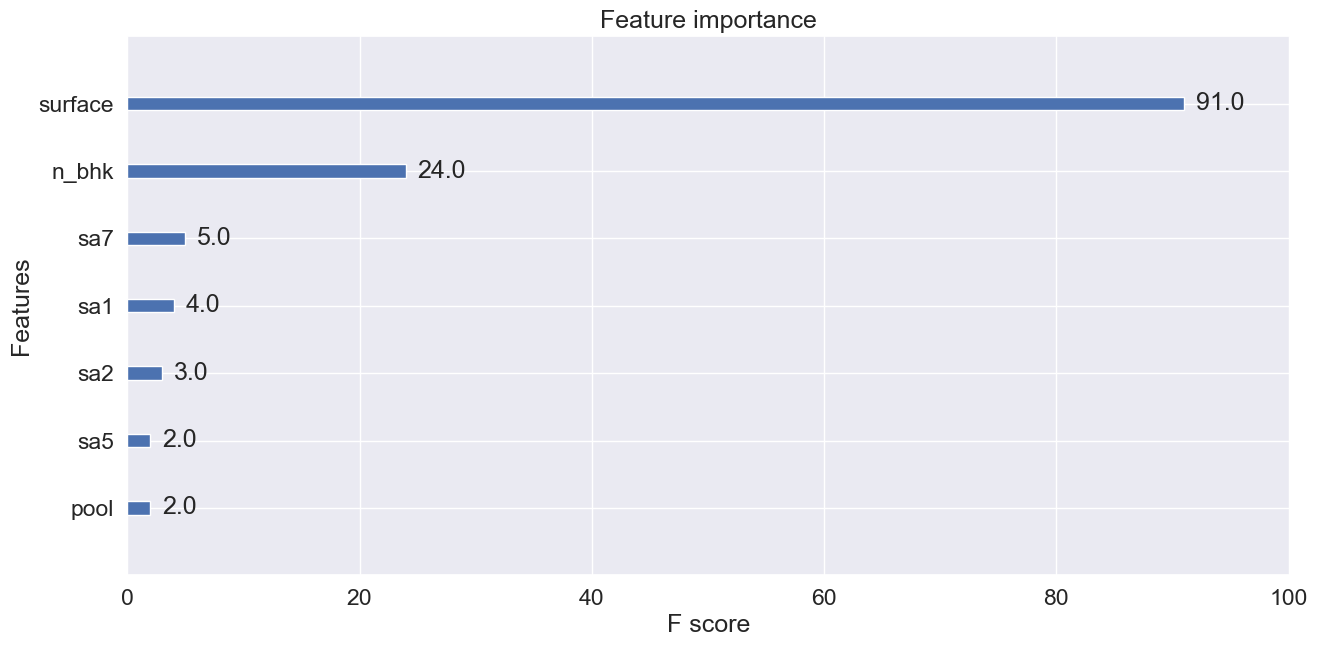

In [116]:
# plot the feature importance 
plt.rcParams["figure.figsize"] = (15,7)
xgb.plot_importance(xgbr)
plt.show()

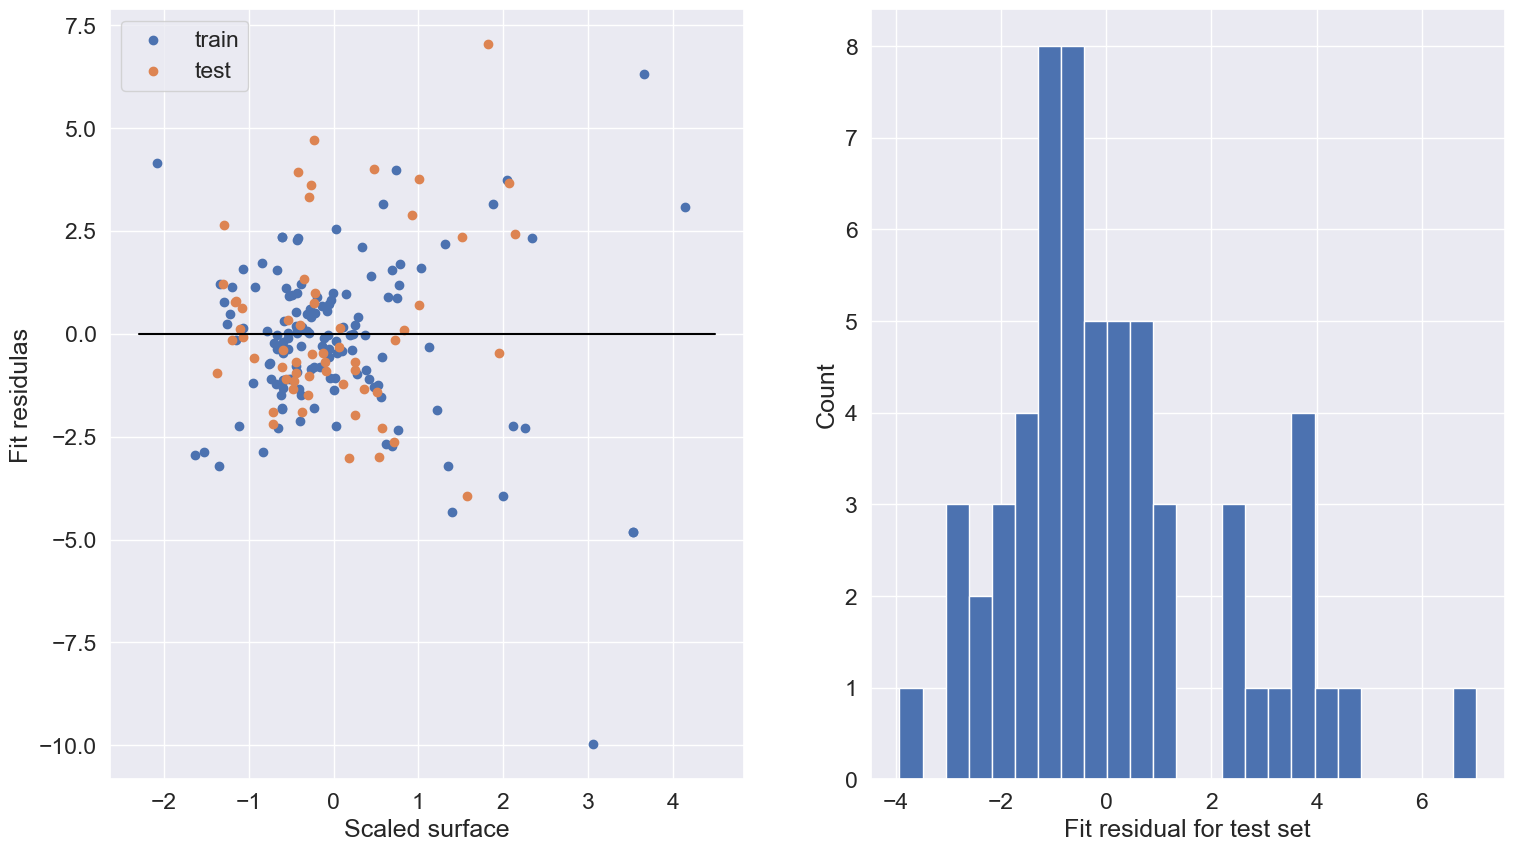

mean residuals: 0.16 
std: 2.13


In [117]:
#  plot the residuals
plotResidue(xgbr, X, y, rs=rs)

## K-Nearest Neighbours Regression

In [118]:
%%time

knn = KNeighborsRegressor()
pg= {
    "n_neighbors": range(1,16),
    "weights": ['uniform', 'distance'],
    "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']
}
knn_cv =gridSearchReport(knn, X, y, pg, rs=rs)

Best parameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'uniform'}
Best CV score: 9.964587111111111
MSE, R2 train: 5.3243968491484175 ,  0.860623745810839
MSE, R2 test: 4.629480973634654 ,  0.7964717597909714
Elapsed time: 35.09 s , 0.58 min
CPU times: total: 5.56 s
Wall time: 35.1 s


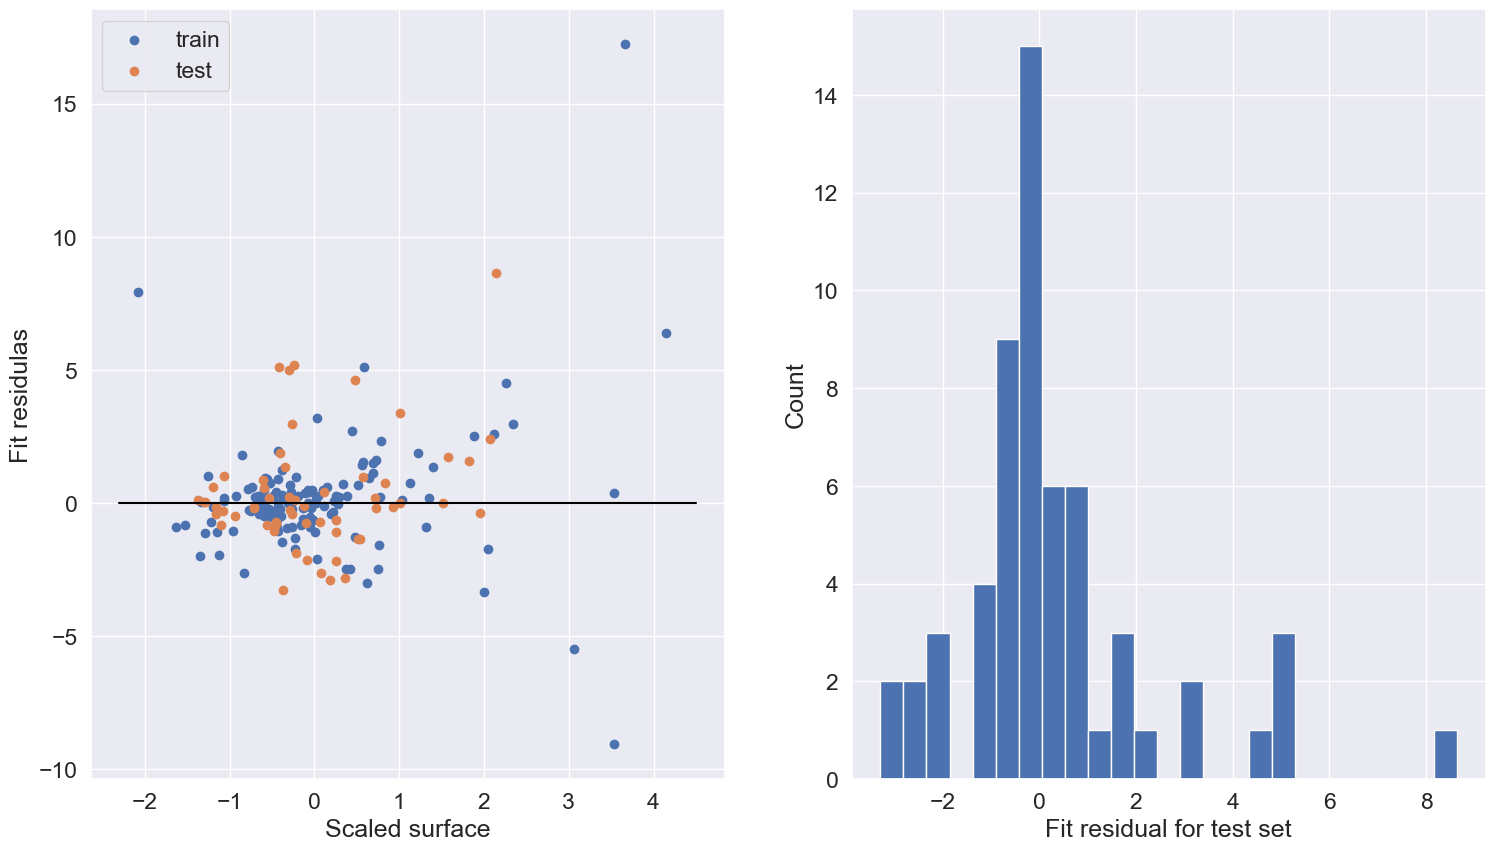

mean residuals: 0.3 
std: 2.13


In [119]:
plotResidue(knn_cv, X, y, rs=rs)

In [120]:
from sklearn.model_selection import validation_curve
param_range = range(1, 31)
knn_cv = KNeighborsRegressor()
train_scores, val_scores = validation_curve(knn_cv, X_train, y_train,
                                           param_name='n_neighbors',
                                           param_range = param_range,
                                           n_jobs=-1,
                                           scoring="neg_mean_squared_error",
                                           cv=10)

In [121]:
train_scores.shape

(30, 10)

In [122]:
train_mean_score = -np.mean(train_scores, axis=1)
val_mean_score = -np.mean(val_scores, axis=1)

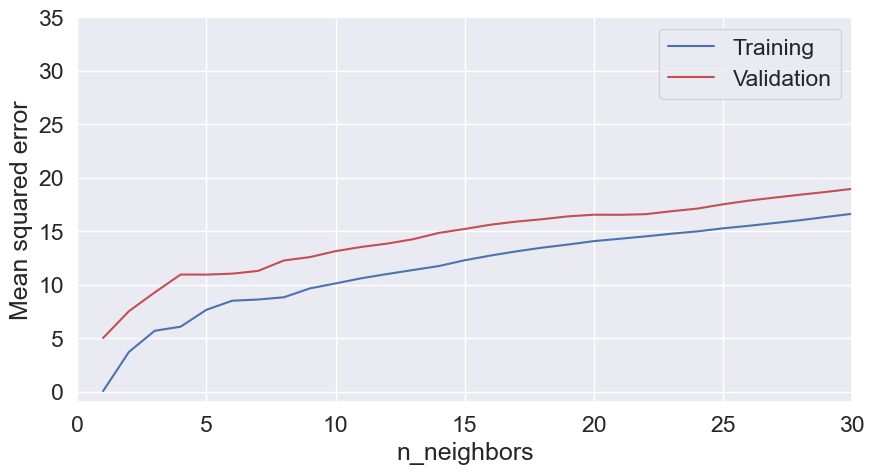

In [123]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(param_range, train_mean_score, color="b", label="Training")
plt.plot(param_range, val_mean_score, color="r", label="Validation")
plt.xlim(1,15)
plt.xlabel( "n_neighbors" )
plt.ylim(-1, 35)
plt.xlim(0, 30)
plt.ylabel( "Mean squared error" )
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


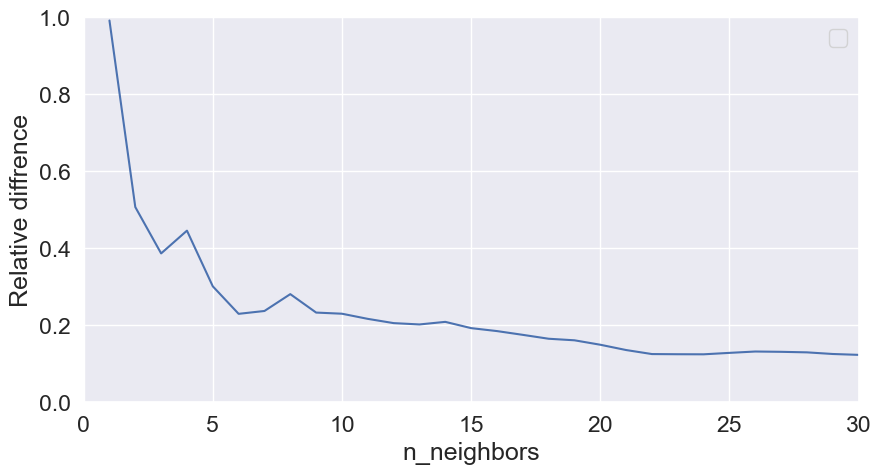

In [124]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(param_range, (val_mean_score-train_mean_score)/val_mean_score)
plt.xlabel( "n_neighbors" )
plt.ylim(0, 1)
plt.xlim(0, 30)
plt.ylabel( "Relative diffrence" )
plt.legend()
plt.show()

In [125]:
knn_cv = KNeighborsRegressor(n_neighbors=20, weights="uniform")
knn_cv.fit(X_train, y_train)
y_pred_knn = knn_cv.predict(X_test)
print(r2_score(y_train, knn_cv.predict(X_train)), r2_score(y_test, y_pred_knn))
mean_squared_error(y_train, knn_cv.predict(X_train)), mean_squared_error(y_test, y_pred_knn)

0.6441828613398988 0.6853118392760982


(13.592786396624088, 7.157939611737289)

In [126]:
from sklearn.model_selection import cross_val_score

In [127]:
cross_val_list = cross_val_score(knn_cv, X_train, y_train, 
                                scoring="neg_mean_squared_error", cv=10)
score_val_knn = -np.mean(cross_val_list)
score_val_knn

16.536680985442302

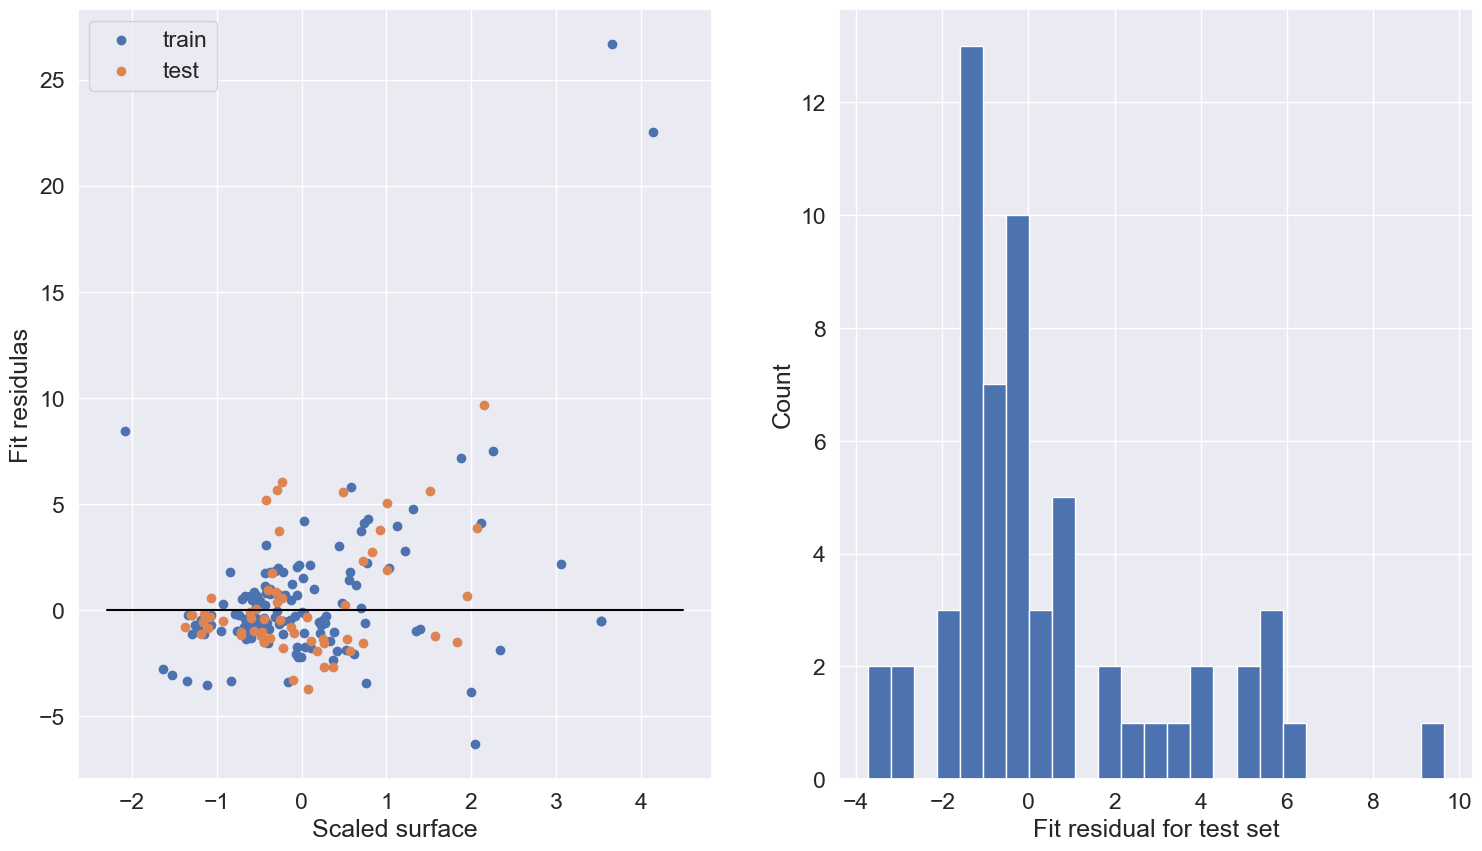

mean residuals: 0.38 
std: 2.65


In [128]:
# plot the residuals
plotResidue(knn_cv, X, y, rs=rs)

## Suport Vector Regression

In [129]:
svr = SVR()
pg = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "gamma": ['scale', 'auto'],
    "C": np.logspace(-3, 3, 10),
    "epsilon": np.linspace(.1, 1., 10) 
}

svr_cv = gridSearchReport( svr, X, y, pg, cv=10, rs=rs)

Best parameters: {'C': 215.44346900318823, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score: 7.322086308871188
MSE, R2 train: 3.4215678124025546 ,  0.9104339292021136
MSE, R2 test: 4.590335394682223 ,  0.7981927369029902
Elapsed time: 23.03 s , 0.38 min


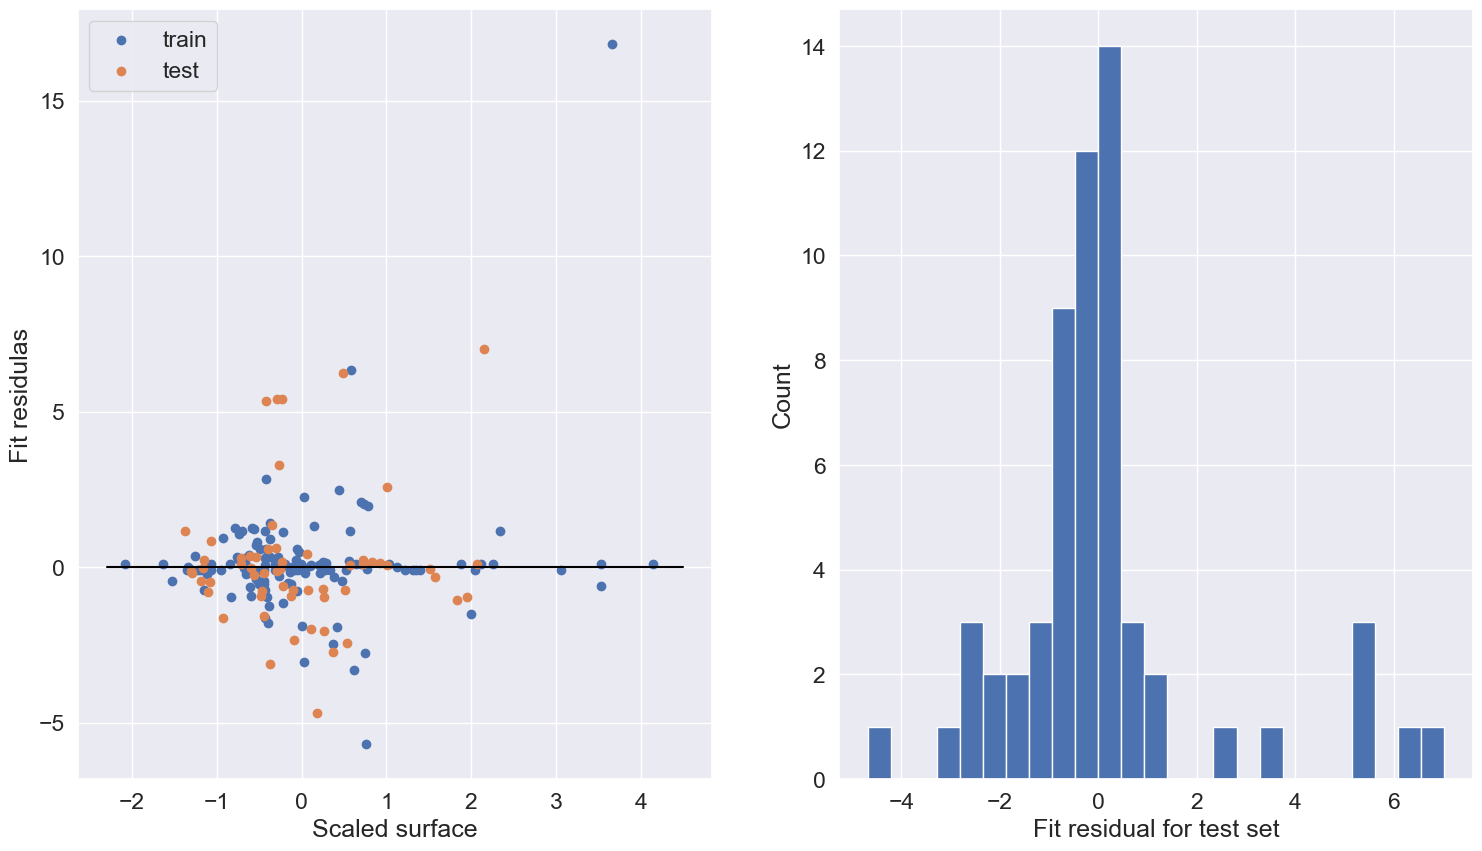

mean residuals: 0.13 
std: 2.14


In [130]:
# plot the residuals
plotResidue(svr_cv, X, y, rs=rs)

## Comparing the estimators

In [131]:
# fcuntions to make a comparision between all the models
def sortXy(X, y):
    """
    Prepares the features to have the fit only for "surface" variable. 
    """ 
    df = X.copy()
    df["price"] = y
    df=df.sort_values("surface").reset_index(drop=True)
    return df.drop(columns=["price"]), df["price"]

In [132]:
def get_scores(X, y, est_name, est):
    """
    Computes the validation and tets scores. 
    Params:
        X: Pandas dataframe, feature data
        y: Pandas series, target
        est_name: str
            estromator name
        est: regressor
            the regression estimator
    Return:
        r2 for the test sample, mse for validation sample and the labels for plotting.
    """ 
    y_pred = est.predict(X)
    r2_test = round(r2_score(y, y_pred), 1)
    if est_name == "Linear Regression":
        mse_cv = "--"
    elif est_name == "Extreme Gradient Boosting":
        mse_cv = round(df_grid_best["val_score"].to_list()[0], 1)
    elif est_name == "K-Nearest Neighbors Regression":
        mse_cv = round(score_val_knn, 1)
    else:
        mse_cv=round(abs(est.best_score_), 1)
    
    lbl = est_name+":  R2_test="+str(r2_test)+", MSE_cv="+str(mse_cv)
    
    return r2_test, mse_cv, lbl


In [133]:
def plotLines( X, y, estimators, rs):
    """
    Plots the fitted curve for the given estimators to test data vs. "surface" variable.
    Params:
        X: Pandas dataframe 
            features 
        y: Pandas series 
            target
        estimators: list 
            list of regressors
        rs: int 
            random state
    """    
    X, y = sortXy( X, y )
    colors = ["k", "b", "r", "g"]
    fig, axe = plt.subplots(figsize=(20,10))
    axe.scatter( X["surface"], y )
    i = 0
    for k, estimator  in estimators.items():
        r2_test, mse_cv, label = get_scores( X, y, k, estimator )
        axe.plot(X["surface"], estimator.predict(X), label=label, c=colors[i])
        i+=1
    axe.set_xlabel("Scaled surface")
    axe.set_ylabel("Price in millions")
    axe.legend()

    

In [134]:
estimators1 = {
              "Linear Regression": lr, 
              "Ridge Regression": ridg_cv, 
              "Lasso Regression": lasso_cv, 
              "Elastic Net": elastic_cv, 
}

estimators2 = {              
              "Random Forest Regression": rfr_cv, 
              "Extreme Gradient Boosting": xgbr, 
              "K-Nearest Neighbors Regression": knn_cv, 
              "Support Vector Regression": svr_cv
}

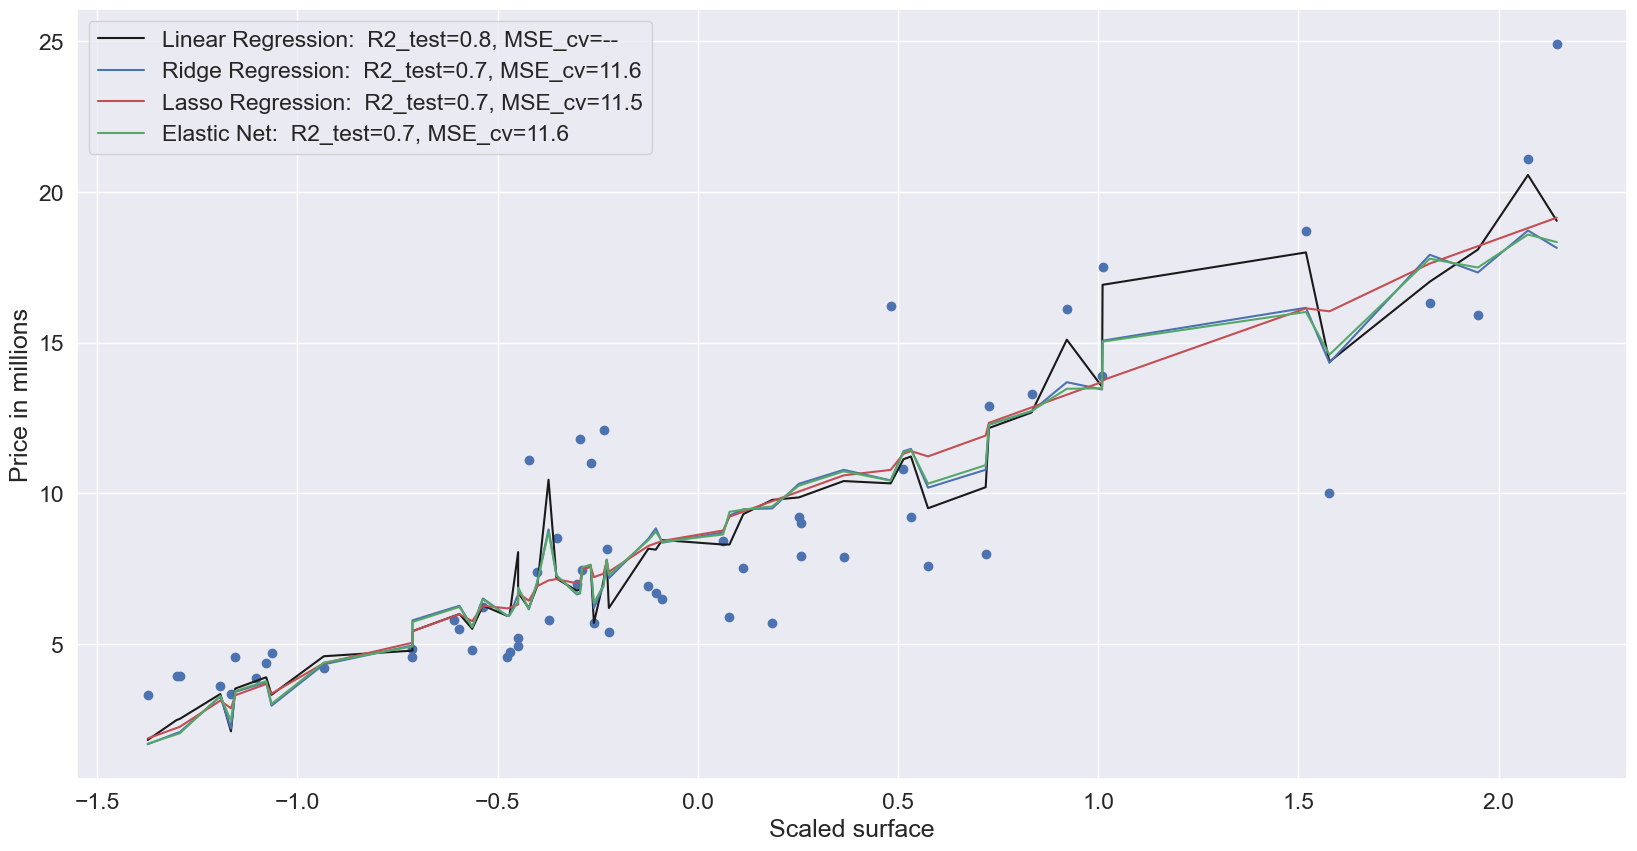

In [135]:
plotLines(X_test ,y_test, estimators1, rs=rs)

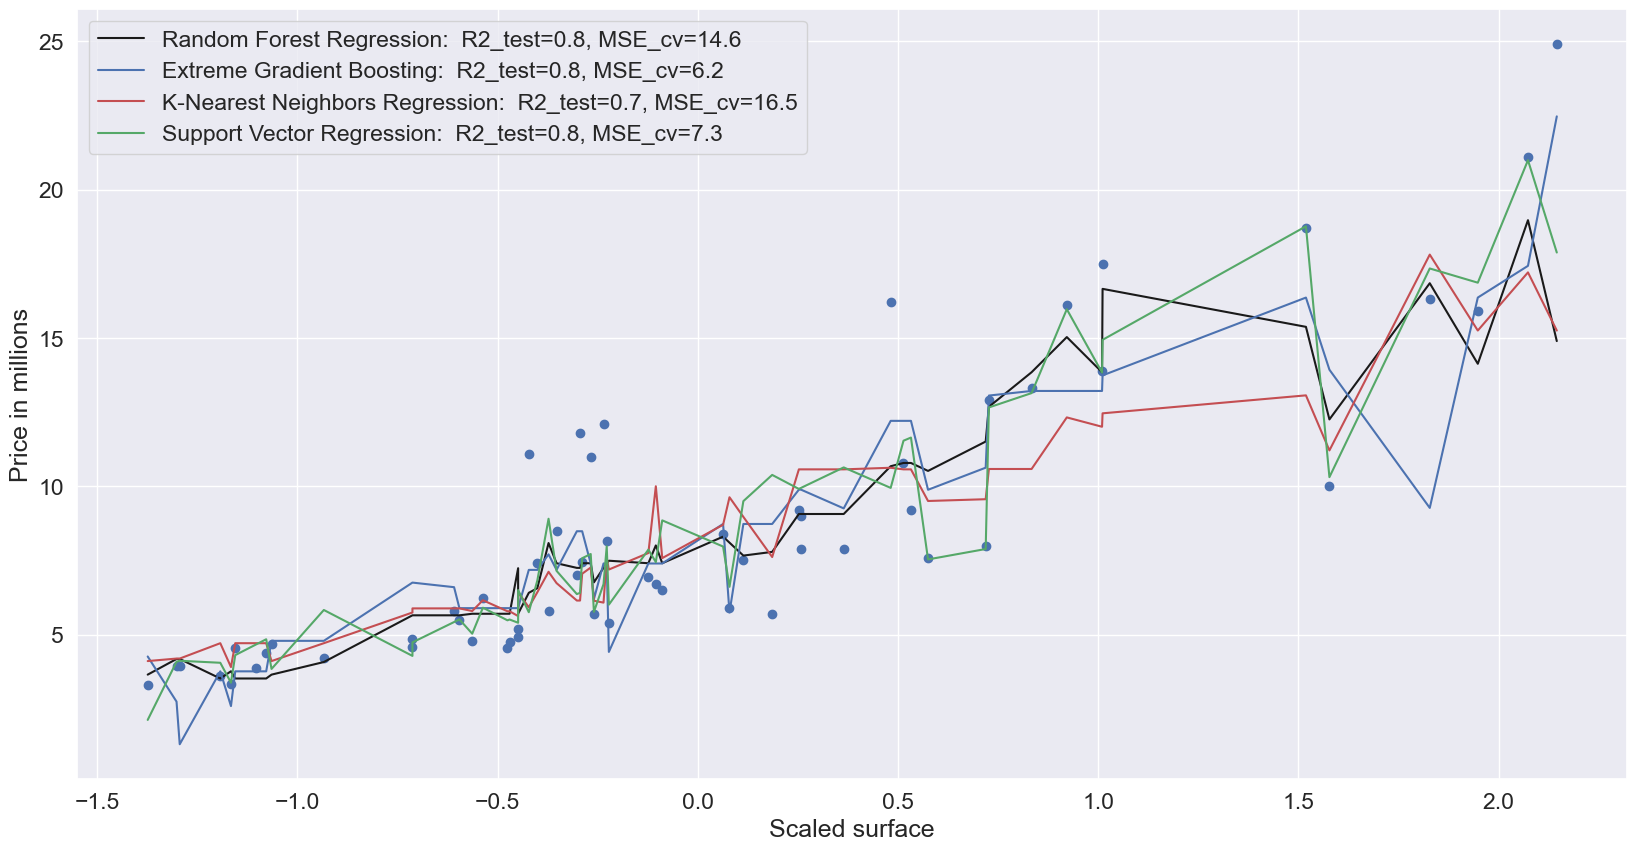

In [136]:
plotLines(X_test,y_test, estimators2, rs=rs)

# Conclusions

The best estimator is the Extreme Gradient boosting followd by Support Vector Regressor and then the Linear regression methods